In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys, cv2, glob, os, time
import pandas as pd 
import io
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten,Activation
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
import matplotlib.pyplot as plt

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding


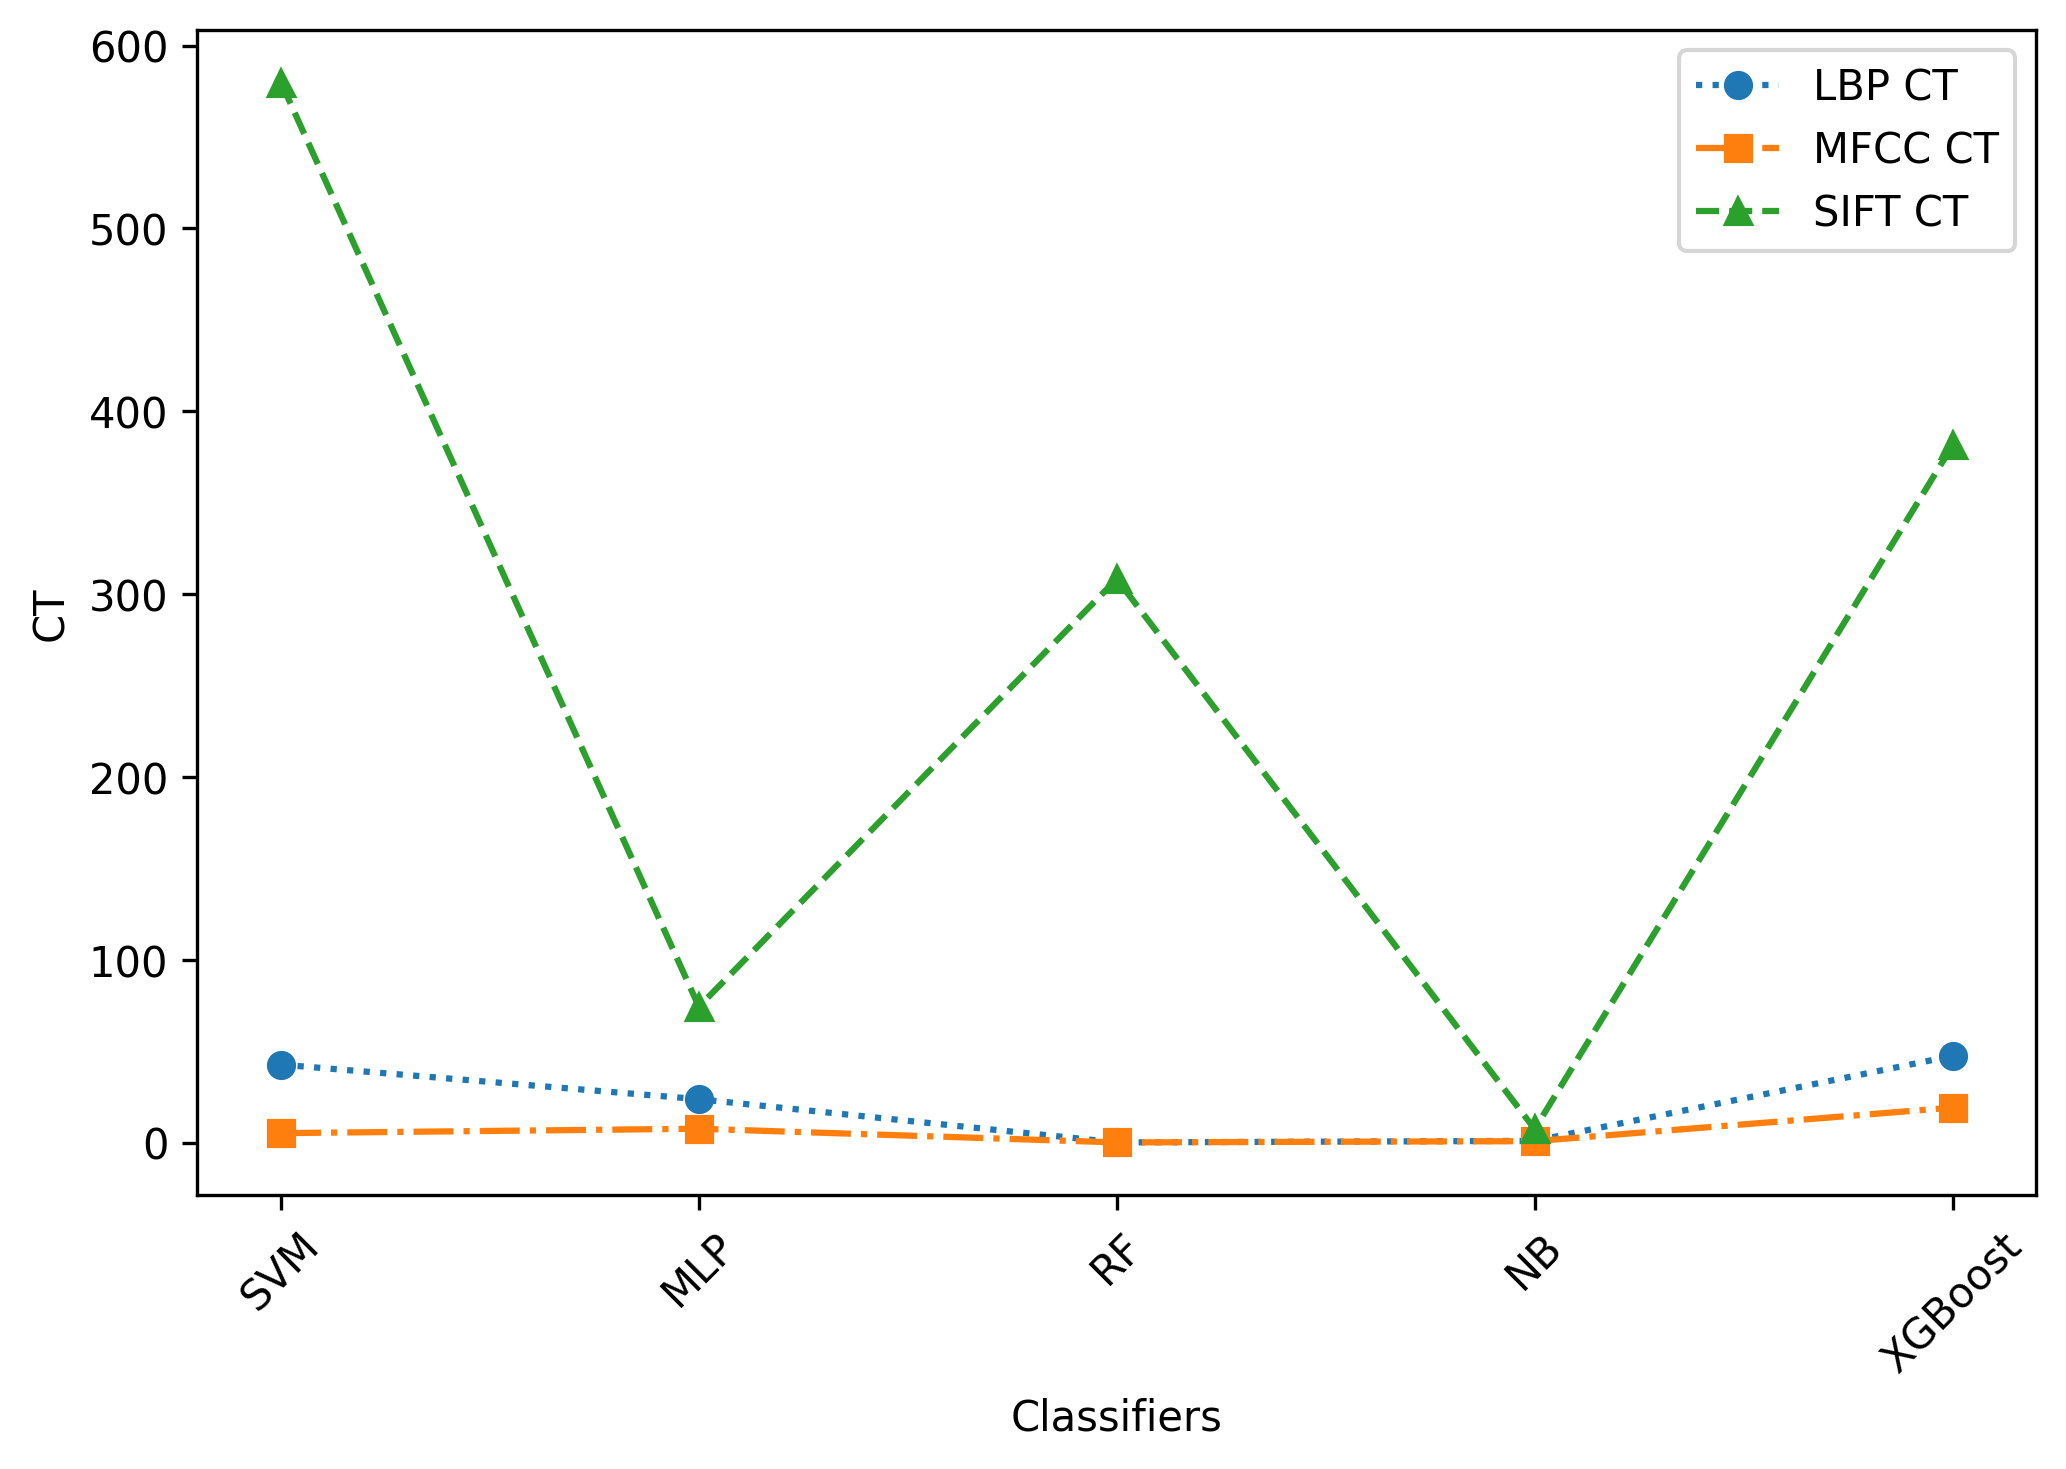

In [21]:
import matplotlib.pyplot as plt

# Data for LBP features
classifiers_lbp = ['SVM', 'MLP', 'RF', 'NB', 'XGBoost']
accuracy_lbp = [0.994, 0.999, 0.958, 1.00, 1.00]
ct_lbp = [42.62, 23.70, 0.057, 0.91, 47.37]

# Data for MFCC features
classifiers_mfcc = ['SVM', 'MLP', 'RF', 'NB', 'XGBoost']
accuracy_mfcc = [0.668, 0.702, 0.732, 0.803, 0.812]
ct_mfcc = [5.13, 7.56, 0.06, 0.77, 19.10]

# Data for SIFT features
classifiers_sift = ['SVM', 'MLP', 'RF', 'NB', 'XGBoost']
accuracy_sift = [0.981275, 0.981832, 0.985845, 0.973807, 0.985733]
ct_sift = [579.8154, 74.31277, 308.2703, 7.335622, 381.2864]

# Plotting the line graphs
plt.figure(figsize=(7, 5),dpi=300)

# Plotting CT
plt.plot(classifiers_lbp, ct_lbp, marker='o', label='LBP CT', linestyle=':')
plt.plot(classifiers_mfcc, ct_mfcc, marker='s', label='MFCC CT', linestyle='-.')
plt.plot(classifiers_sift, ct_sift, marker='^', label='SIFT CT', linestyle='--')

plt.xlabel('Classifiers')
plt.ylabel('CT')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('CT.png')



In [2]:
newfeatures=pd.read_csv('AutoEncoder_TVAECopulaCTGANMEnDatasetAIandOrignal.csv')
newfeatures=newfeatures.drop('Unnamed: 0',axis=1)

In [3]:
newfeatures

0         1          2         3          4         5  \
0      2.575934  3.406518   0.985877  2.513286   2.078901  3.340337   
1      5.931482  0.000000  10.971255  2.098810   6.063824  0.000000   
2      7.631672  1.608854   3.147973  2.570775   3.053615  2.594648   
3      6.255082  5.588604   0.840216  1.248374  12.751494  0.000000   
4      7.257213  0.000000   8.751850  0.000000   1.409395  2.059135   
...         ...       ...        ...       ...        ...       ...   
71995  6.043698  3.883302   4.370098  8.787928   3.794796  2.172833   
71996  1.715257  5.243652   1.754775  2.692273   2.333793  0.000000   
71997  3.588332  0.000000   0.886069  5.245164   2.333912  0.000000   
71998  5.336609  4.800036   2.111762  6.292850   3.285184  1.370703   
71999  5.985069  0.527971   2.974794  7.531581   4.078068  2.433673   

               6         7          8         9  ...        23         24  \
0       3.574777  1.735507   0.000000  1.391206  ...  0.000000   3.563121   
1       4.606017  4.033393   3.616107  7.525082  ...  0.177690   3.725625   
2       5.070499  8.079039   8.482161  5.669112  ...  2.857120   7.762401   
3       0.000000  8.868077   9.806497  3.169620  ...  1.836059   9.094900   
4      14.172281  2.947287  11.424707  4.974127  ...  4.115703  10.360476   
...          ...       ...        ...       ...  ...       ...        ...   
71995   3.551379  4.349073   4.539538  7.567385  ...  8.156714   2.998220   
71996   2.008982  2.124412   3.651036  3.713877  ...  8.150002   2.756553   
71997   0.736447  6.151850   2.940325  2.317925  ...  3.590051   1.684233   
71998   2.908315  7.427112   3.205659  0.312383  ...  2.807633   2.121051   
71999   3.671442  3.829103   4.898558  4.004702  ...  7.882172   2.995757   

             25        26        27        28         29        30        31  \
0      1.688389  0.000000  4.559227  3.645957   0.803725  2.481606  0.000000   
1      0.000000  1.962852  2.518312  9.314289   7.468658  2.081278  3.813298   
2      2.901831  1.547878  2.934650  5.863956   8.562422  1.639403  2.305050   
3      3.149242  8.919035  4.037540  2.245236   5.125553  8.551779  0.707842   
4      7.574772  5.995200  0.000000  7.761070  11.568981  0.000000  5.964283   
...         ...       ...       ...       ...        ...       ...       ...   
71995  4.887293  4.475481  7.937799  2.353642   4.231275  6.734046  3.111127   
71996  4.026357  2.741603  6.134460  3.766453   3.289139  5.593276  2.282023   
71997  1.687857  2.130371  4.279153  1.065848   2.581122  6.231813  0.564298   
71998  3.589939  1.064016  2.446679  5.249454   6.407229  3.846857  3.692861   
71999  2.621241  3.192219  5.135487  2.881075   1.894029  7.507997  3.106174   

                      target  
0      Tr_IP_Normal_Original  
1      Tr_IP_Normal_Original  
2      Tr_IP_Normal_Original  
3      Tr_IP_Normal_Original  
4      Tr_IP_Normal_Original  
...                      ...  
71995          IoT_Normal_AI  
71996          IoT_Normal_AI  
71997          IoT_Normal_AI  
71998          IoT_Normal_AI  
71999          IoT_Normal_AI  

[72000 rows x 33 columns]

In [5]:

target=newfeatures['target']
feature=newfeatures.drop('target',axis=1)
#feature=newfeatures.drop('Unnamed: 0',axis=1)

In [103]:
feature.shape

(72000, 200)

In [6]:
feature

0         1          2         3          4         5  \
0      2.575934  3.406518   0.985877  2.513286   2.078901  3.340337   
1      5.931482  0.000000  10.971255  2.098810   6.063824  0.000000   
2      7.631672  1.608854   3.147973  2.570775   3.053615  2.594648   
3      6.255082  5.588604   0.840216  1.248374  12.751494  0.000000   
4      7.257213  0.000000   8.751850  0.000000   1.409395  2.059135   
...         ...       ...        ...       ...        ...       ...   
71995  6.043698  3.883302   4.370098  8.787928   3.794796  2.172833   
71996  1.715257  5.243652   1.754775  2.692273   2.333793  0.000000   
71997  3.588332  0.000000   0.886069  5.245164   2.333912  0.000000   
71998  5.336609  4.800036   2.111762  6.292850   3.285184  1.370703   
71999  5.985069  0.527971   2.974794  7.531581   4.078068  2.433673   

               6         7          8         9  ...        22        23  \
0       3.574777  1.735507   0.000000  1.391206  ...  0.000000  0.000000   
1       4.606017  4.033393   3.616107  7.525082  ...  3.369973  0.177690   
2       5.070499  8.079039   8.482161  5.669112  ...  2.924790  2.857120   
3       0.000000  8.868077   9.806497  3.169620  ...  3.285080  1.836059   
4      14.172281  2.947287  11.424707  4.974127  ...  5.476846  4.115703   
...          ...       ...        ...       ...  ...       ...       ...   
71995   3.551379  4.349073   4.539538  7.567385  ...  0.991731  8.156714   
71996   2.008982  2.124412   3.651036  3.713877  ...  2.733980  8.150002   
71997   0.736447  6.151850   2.940325  2.317925  ...  2.326064  3.590051   
71998   2.908315  7.427112   3.205659  0.312383  ...  2.189290  2.807633   
71999   3.671442  3.829103   4.898558  4.004702  ...  1.531652  7.882172   

              24        25        26        27        28         29        30  \
0       3.563121  1.688389  0.000000  4.559227  3.645957   0.803725  2.481606   
1       3.725625  0.000000  1.962852  2.518312  9.314289   7.468658  2.081278   
2       7.762401  2.901831  1.547878  2.934650  5.863956   8.562422  1.639403   
3       9.094900  3.149242  8.919035  4.037540  2.245236   5.125553  8.551779   
4      10.360476  7.574772  5.995200  0.000000  7.761070  11.568981  0.000000   
...          ...       ...       ...       ...       ...        ...       ...   
71995   2.998220  4.887293  4.475481  7.937799  2.353642   4.231275  6.734046   
71996   2.756553  4.026357  2.741603  6.134460  3.766453   3.289139  5.593276   
71997   1.684233  1.687857  2.130371  4.279153  1.065848   2.581122  6.231813   
71998   2.121051  3.589939  1.064016  2.446679  5.249454   6.407229  3.846857   
71999   2.995757  2.621241  3.192219  5.135487  2.881075   1.894029  7.507997   

             31  
0      0.000000  
1      3.813298  
2      2.305050  
3      0.707842  
4      5.964283  
...         ...  
71995  3.111127  
71996  2.282023  
71997  0.564298  
71998  3.692861  
71999  3.106174  

[72000 rows x 32 columns]

# Original

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.15, random_state=1, stratify=target, shuffle=True)
    

In [8]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=25) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.9516666666666667
                       precision    recall  f1-score   support

        IoT_Attack_AI       0.95      0.90      0.93      1350
  IoT_Attack_Original       0.95      0.97      0.96      1350
        IoT_Normal_AI       0.94      0.95      0.94      1350
  IoT_Normal_Original       0.97      0.96      0.97      1350
      Tr_IP_Attack_AI       0.94      0.93      0.94      1350
Tr_IP_Attack_Original       0.96      0.99      0.98      1350
      Tr_IP_Normal_AI       0.94      0.92      0.93      1350
Tr_IP_Normal_Original       0.95      0.99      0.97      1350

             accuracy                           0.95     10800
            macro avg       0.95      0.95      0.95     10800
         weighted avg       0.95      0.95      0.95     10800

[[1219   21   45    0   35    0   30    0]
 [   8 1315    6   21    0    0    0    0]
 [  23    1 1276   13   17    0   20    0]
 [   1   47   11 1291    0    0    0    0]
 [  15    0    9    0 1259   47   20    0]
 [   0 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
print('KNN')
neigh = KNeighborsClassifier(n_neighbors=2)
xgb_pred = neigh.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

KNN
                       precision    recall  f1-score   support

        IoT_Attack_AI       0.95      0.88      0.91      1350
  IoT_Attack_Original       0.91      0.99      0.95      1350
        IoT_Normal_AI       0.96      0.91      0.94      1350
  IoT_Normal_Original       0.97      0.95      0.96      1350
      Tr_IP_Attack_AI       0.95      0.93      0.94      1350
Tr_IP_Attack_Original       0.93      0.99      0.96      1350
      Tr_IP_Normal_AI       0.95      0.90      0.93      1350
Tr_IP_Normal_Original       0.93      0.99      0.96      1350

             accuracy                           0.94     10800
            macro avg       0.94      0.94      0.94     10800
         weighted avg       0.94      0.94      0.94     10800

[[1192   57   41    2   15    1   36    6]
 [   4 1332    0   14    0    0    0    0]
 [  49   12 1235   28   17    0    8    1]
 [   2   56    7 1285    0    0    0    0]
 [   6    2    3    0 1251   81    7    0]
 [   0    0    0    0 

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=25)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
                       precision    recall  f1-score   support

        IoT_Attack_AI       0.97      0.92      0.94      1350
  IoT_Attack_Original       0.95      0.98      0.97      1350
        IoT_Normal_AI       0.95      0.96      0.96      1350
  IoT_Normal_Original       0.98      0.96      0.97      1350
      Tr_IP_Attack_AI       0.96      0.93      0.95      1350
Tr_IP_Attack_Original       0.95      1.00      0.97      1350
      Tr_IP_Normal_AI       0.95      0.92      0.94      1350
Tr_IP_Normal_Original       0.94      0.99      0.97      1350

             accuracy                           0.96     10800
            macro avg       0.96      0.96      0.96     10800
         weighted avg       0.96      0.96      0.96     10800

[[1244   17   37    0   22    0   30    0]
 [   5 1321    5   19    0    0    0    0]
 [  18    0 1296   11   11    0   14    0]
 [   1   46   12 1291    0    0    0    0]
 [   8    0    6    0 1261   59   15    1]
 [   0    0    0    0 

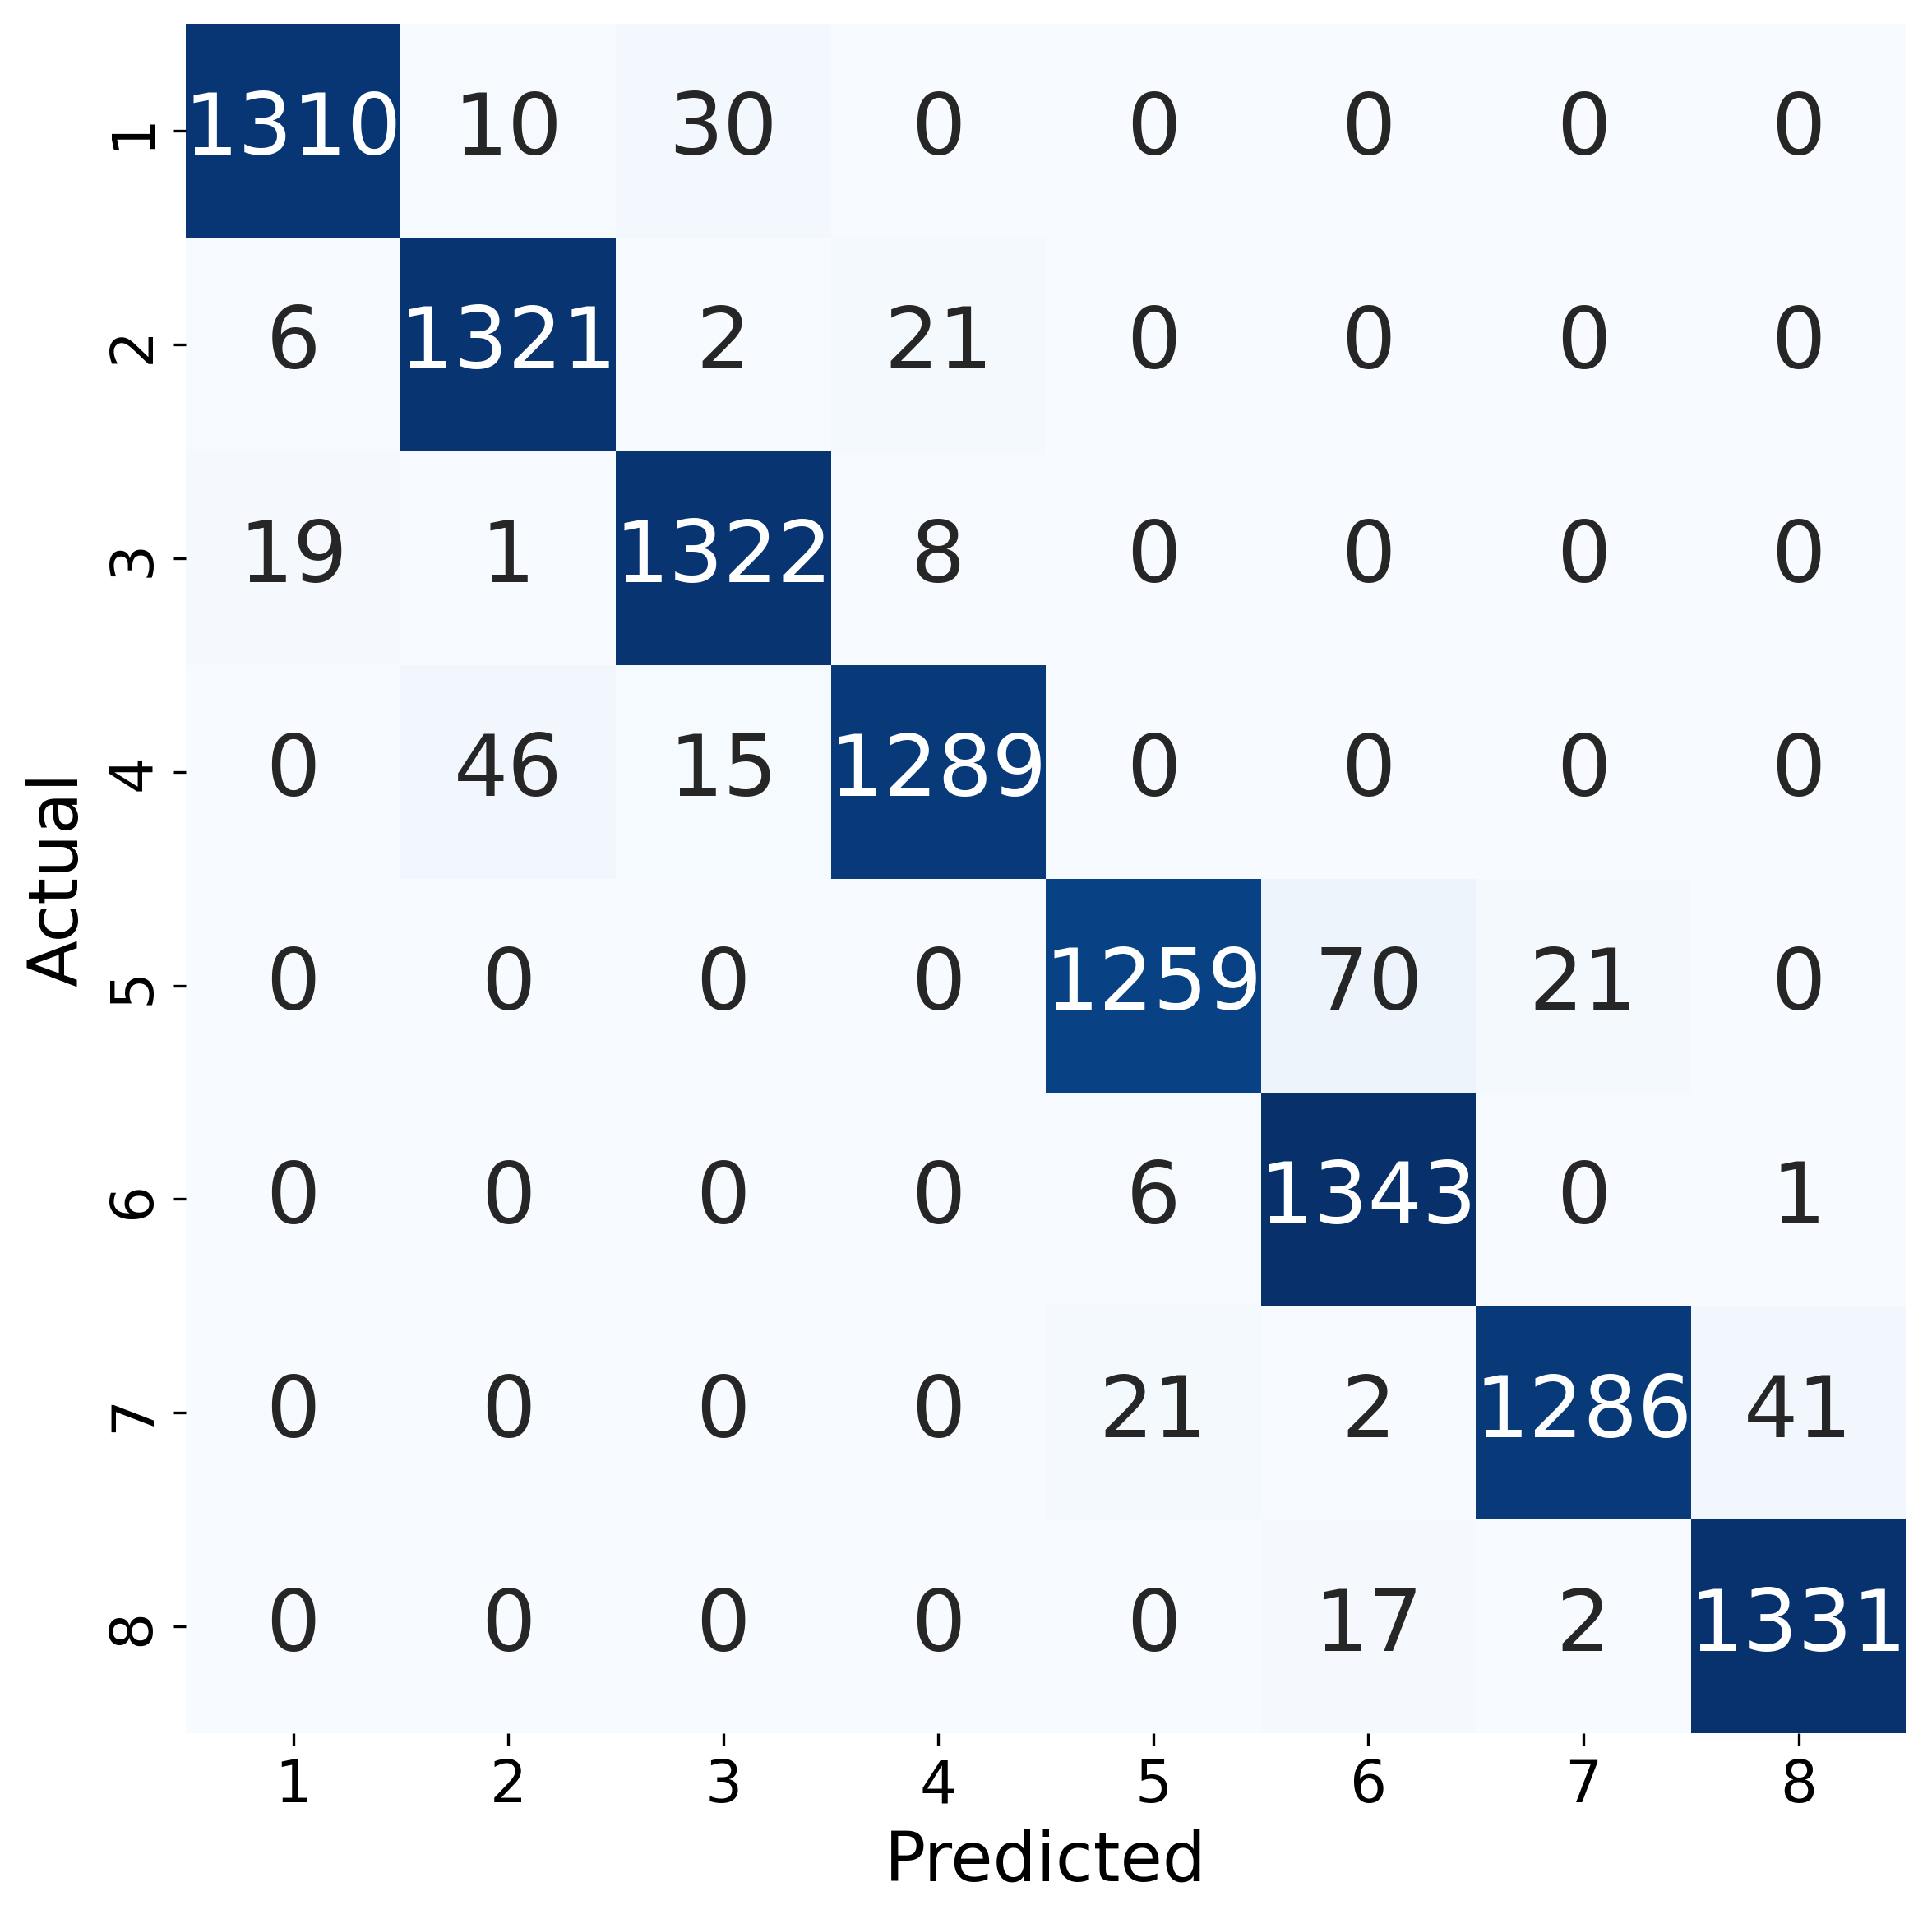

In [14]:
def conf_matrix(an):
    fig, ax =plt.subplots(figsize=(9,9),dpi=300)
    labels=['1', '2', '3', '4','5', '6','7', '8']
    ax=sns.heatmap(an, annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    #plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.savefig('conETC8Class.pdf')
array6 =[[1310,   10 ,  30,    0,    0 ,   0  ,  0,    0],
 [   6, 1321,    2  , 21 ,   0 ,   0 ,   0 ,   0],
 [  19 ,   1, 1322 ,   8 ,   0 ,   0  ,  0 ,   0],
 [   0 ,  46 ,  15, 1289 ,   0 ,   0  ,  0  ,  0],
 [   0 ,   0,    0 ,   0 ,1259 ,  70 ,  21 ,   0],
 [   0 ,   0,    0 ,   0  ,  6 ,1343  ,  0  ,  1],
 [   0 ,   0 ,   0 ,   0 ,  21 ,   2 ,1286 ,  41],
 [   0 ,   0  ,  0,    0  ,  0 ,  17 ,   2, 1331]]
conf_matrix(array6)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=42, solver='saga',multi_class='multinomial',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

                       precision    recall  f1-score   support

        IoT_Attack_AI       0.78      0.67      0.72      1350
  IoT_Attack_Original       0.72      0.84      0.77      1350
        IoT_Normal_AI       0.77      0.64      0.70      1350
  IoT_Normal_Original       0.68      0.80      0.73      1350
      Tr_IP_Attack_AI       0.73      0.59      0.65      1350
Tr_IP_Attack_Original       0.71      0.86      0.78      1350
      Tr_IP_Normal_AI       0.69      0.58      0.63      1350
Tr_IP_Normal_Original       0.74      0.81      0.77      1350

             accuracy                           0.72     10800
            macro avg       0.73      0.72      0.72     10800
         weighted avg       0.73      0.72      0.72     10800

[[ 911  182   17   15   75   42   77   31]
 [  73 1131   14   95   15    1   19    2]
 [  14   15  865  343   46   23   27   17]
 [   4  119  129 1079    3    1    9    6]
 [  60   49   48   34  790  342   27    0]
 [  11   21    6    4  150

C:\Users\knowl\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [82]:
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical


# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)

y1 = to_categorical(y_train)
y2 = to_categorical(y_test)


# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(256))

# Add output layer
model.add(Dense(8, activation='sigmoid'))  # For binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y1, epochs=20, batch_size=32, validation_data=(X_test, y2))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y2)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/20
1913/1913 [==============================] - 28s 14ms/step - loss: 0.6194 - accuracy: 0.7655 - val_loss: 0.3365 - val_accuracy: 0.8764
Epoch 2/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.4443 - accuracy: 0.8358 - val_loss: 0.3045 - val_accuracy: 0.8921
Epoch 3/20
1913/1913 [==============================] - 30s 15ms/step - loss: 0.4379 - accuracy: 0.8439 - val_loss: 0.3884 - val_accuracy: 0.8800
Epoch 4/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.4020 - accuracy: 0.8555 - val_loss: 0.2626 - val_accuracy: 0.9044
Epoch 5/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3776 - accuracy: 0.8663 - val_loss: 0.2977 - val_accuracy: 0.8924
Epoch 6/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3779 - accuracy: 0.8679 - val_loss: 0.2566 - val_accuracy: 0.9175
Epoch 7/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.3644 - accuracy: 0.8756 - val_loss: 0.2474 -

In [86]:
y_pred_class = model.predict(X_test)
y_pred_class=np.argmax(y_pred_class,axis=1)
ys=np.argmax(y2,axis=1)

print(classification_report(ys,y_pred_class))
print(confusion_matrix(ys,y_pred_class))
a=accuracy_score(ys,y_pred_class)
print(a)

338/338 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1350
           1       0.86      0.96      0.91      1350
           2       0.97      0.85      0.90      1350
           3       0.83      0.90      0.86      1350
           4       0.81      0.92      0.86      1350
           5       0.88      1.00      0.94      1350
           6       0.90      0.76      0.82      1350
           7       0.97      0.87      0.91      1350

    accuracy                           0.90     10800
   macro avg       0.90      0.90      0.90     10800
weighted avg       0.90      0.90      0.90     10800

[[1247   61   35    7    0    0    0    0]
 [   4 1290    0   56    0    0    0    0]
 [  20    5 1145  179    0    1    0    0]
 [   1  136    3 1210    0    0    0    0]
 [   0    0    0    0 1241  105    4    0]
 [   0    0    0    0    5 1345    0    0]
 [   0    0    0    0  274   12 1024

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Generate synthetic data (replace with your real dataset)
num_samples = len(X_train)
seq_length = 200
num_features = 1  # Assuming you have one feature per time step


# Define the model
input_layer = Input(shape=(seq_length, num_features))
conv1 = Conv1D(512, kernel_size=3, activation='relu')(input_layer)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(256, kernel_size=3, activation='relu')(maxpool1)
maxpool2 = MaxPooling1D(pool_size=2)(conv2)
global_maxpool = GlobalMaxPooling1D()(maxpool2)
flatten=Flatten()(global_maxpool)
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(8, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y1, epochs=20, batch_size=32, validation_data=(X_test, y2))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y2)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/20
1913/1913 [==============================] - 153s 80ms/step - loss: 0.8844 - accuracy: 0.6638 - val_loss: 0.5989 - val_accuracy: 0.7774
Epoch 2/20
1913/1913 [==============================] - 184s 96ms/step - loss: 0.5490 - accuracy: 0.7971 - val_loss: 0.4960 - val_accuracy: 0.8147
Epoch 3/20
1913/1913 [==============================] - 186s 97ms/step - loss: 0.4714 - accuracy: 0.8249 - val_loss: 0.4441 - val_accuracy: 0.8350
Epoch 4/20
1913/1913 [==============================] - 187s 98ms/step - loss: 0.4232 - accuracy: 0.8442 - val_loss: 0.4327 - val_accuracy: 0.8381
Epoch 5/20
1913/1913 [==============================] - 202s 106ms/step - loss: 0.3867 - accuracy: 0.8574 - val_loss: 0.4022 - val_accuracy: 0.8517
Epoch 6/20
1913/1913 [==============================] - 184s 96ms/step - loss: 0.3629 - accuracy: 0.8663 - val_loss: 0.3709 - val_accuracy: 0.8637
Epoch 7/20
1913/1913 [==============================] - 183s 95ms/step - loss: 0.3418 - accuracy: 0.8744 - val_loss: 

In [92]:
y_pred_class = model.predict(X_test)
y_pred_class=np.argmax(y_pred_class,axis=1)
ys=np.argmax(y2,axis=1)

print(classification_report(ys,y_pred_class))
print(confusion_matrix(ys,y_pred_class))
a=accuracy_score(ys,y_pred_class)
print(a)

338/338 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1350
           1       0.93      0.98      0.95      1350
           2       0.87      0.84      0.85      1350
           3       0.95      0.94      0.95      1350
           4       0.82      0.83      0.83      1350
           5       0.95      0.96      0.95      1350
           6       0.74      0.87      0.80      1350
           7       0.97      0.87      0.92      1350

    accuracy                           0.89     10800
   macro avg       0.89      0.89      0.89     10800
weighted avg       0.89      0.89      0.89     10800

[[1101   34  135    5   31    0   44    0]
 [   9 1319    5   16    1    0    0    0]
 [  88    4 1134   45   29    0   50    0]
 [   3   57   16 1274    0    0    0    0]
 [   2    1   10    0 1127   49  157    4]
 [   0    0    0    0   55 1292    0    3]
 [   2    0    5    2  127    2 118

In [110]:
import pandas as pd

dataV=dataFFeatures
dataV['Label']=DataFTarget['TType']
dataV

dur  proto  service  state  spkts  dpkts  sbytes  dbytes   rate  sttl  \
0      6441    113        0      2      5      4     212     167   5612    82   
1     11216    113        0      2     13     38     663    4502   5775    30   
2     15030    113        0      2      7     16     314    3585   1099    30   
3     15156    113        3      2     11     12     569     704   1060    30   
4      9699    113        0      2      9      6     478     259   3717    84   
...     ...    ...      ...    ...    ...    ...     ...     ...    ...   ...   
5995   7411    113        0      2     10      6     935    1250   7778    84   
5996      0    120        0      3      0      0      22      28  18842    84   
5997  15393    113        5      2      2      8    1150    1149      0    30   
5998  12337    113        5      2     43      8     499    1078   7469    84   
5999  14616    113        9      2     85     31    4889     995   7774    30   

      ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0     ...                 0                 0               0             0   
1     ...                 0                 0               1             0   
2     ...                 0                 0               2             0   
3     ...                 0                 0               2             1   
4     ...                 1                 0              39             0   
...   ...               ...               ...             ...           ...   
5995  ...                 2                 1               4             0   
5996  ...                 1                 1               5             0   
5997  ...                 0                 0               0             0   
5998  ...                 3                 1               9             0   
5999  ...                 0                 0               0             0   

      ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0              0                 0           0           0                0   
1              0                 0           0           5                0   
2              0                 0           1           5                0   
3              1                 0           1           0                0   
4              0                 0           1          38                0   
...          ...               ...         ...         ...              ...   
5995           0                 0           1           4                0   
5996           0                 0           2           5                0   
5997           0                 1           1           0                0   
5998           0                 1           3           1                0   
5999           0                 0           0           0                0   

                      Label  
0     Tr_IP_Normal_Original  
1     Tr_IP_Normal_Original  
2     Tr_IP_Normal_Original  
3     Tr_IP_Normal_Original  
4     Tr_IP_Normal_Original  
...                     ...  
5995        Tr_IP_Attack_AI  
5996        Tr_IP_Attack_AI  
5997        Tr_IP_Attack_AI  
5998        Tr_IP_Attack_AI  
5999        Tr_IP_Attack_AI  

[36000 rows x 43 columns]

In [94]:


# Create a DataFrame for rows containing 'AI' in 'IoT_Attack_AI'
attack_ai_data = dataV[~dataV['Label'].str.contains('AI', case=False, na=False)]

# Create a DataFrame for rows not containing 'AI' in 'IoT_Attack_AI'
normal_original_data = dataV[~dataV['Label'].str.contains('Original', case=False, na=False)]

# Now, 'attack_ai_data' contains rows where 'IoT_Attack_AI' contains 'AI',
# and 'normal_original_data' contains rows where 'IoT_Attack_AI' does not contain 'AI'


In [95]:
attack_ai_data=attack_ai_data.drop('Label',axis=1)
normal_original_data=normal_original_data.drop('Label',axis=1)

# Proposed

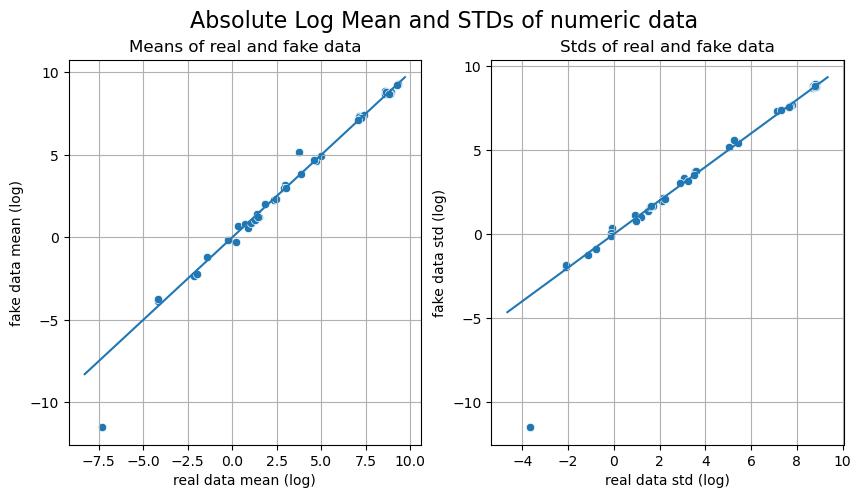

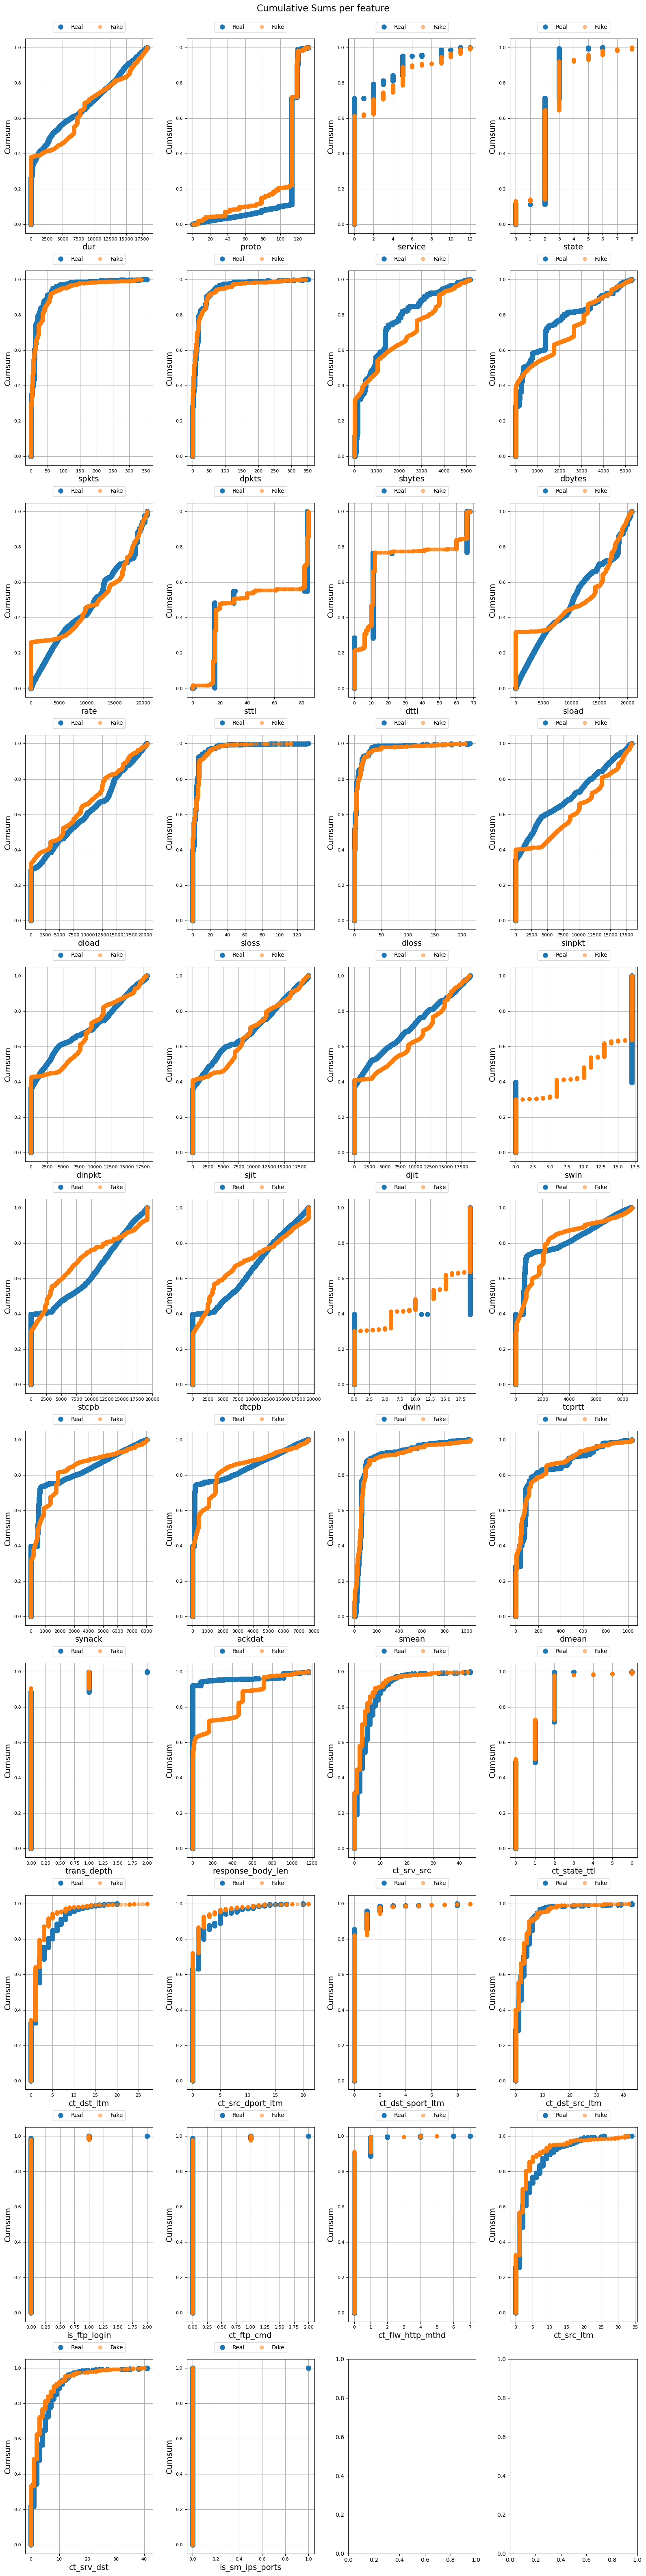

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

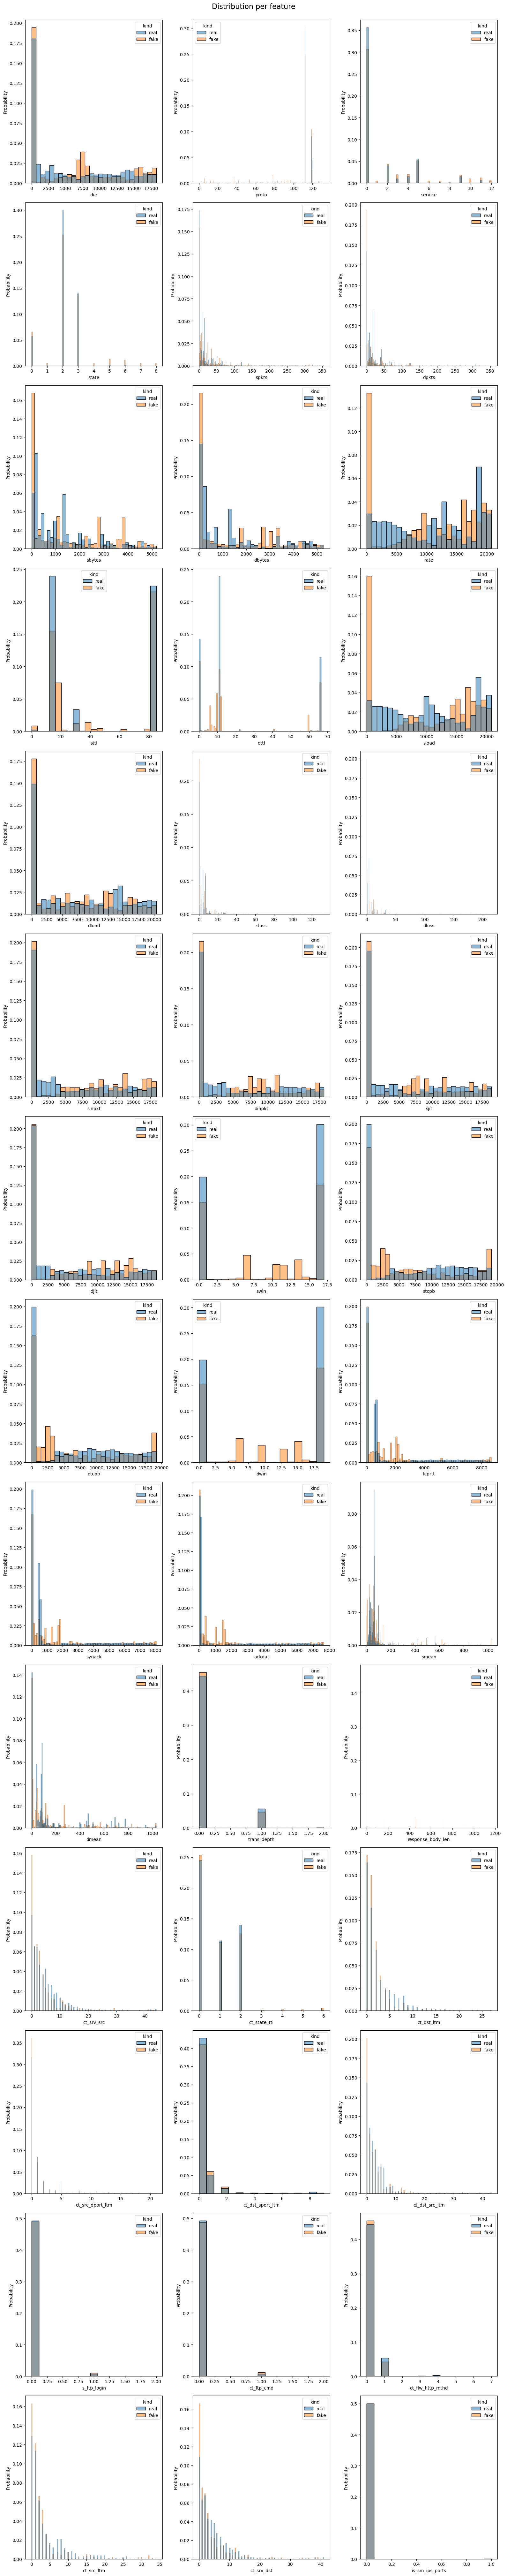

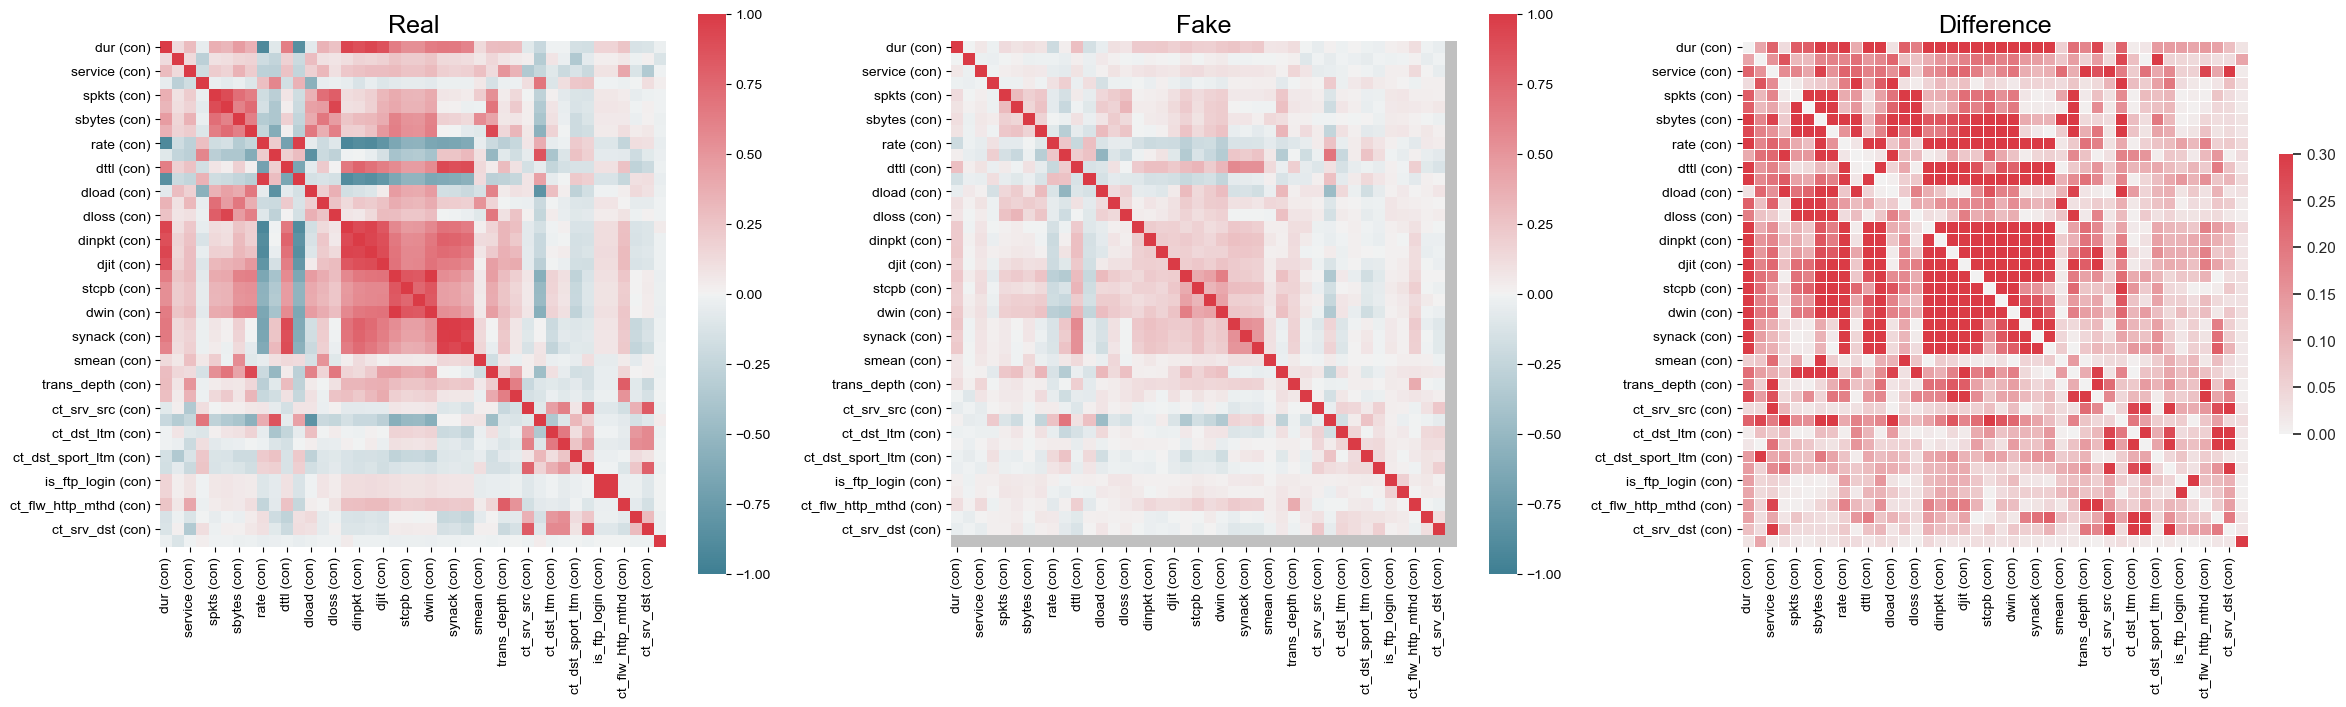

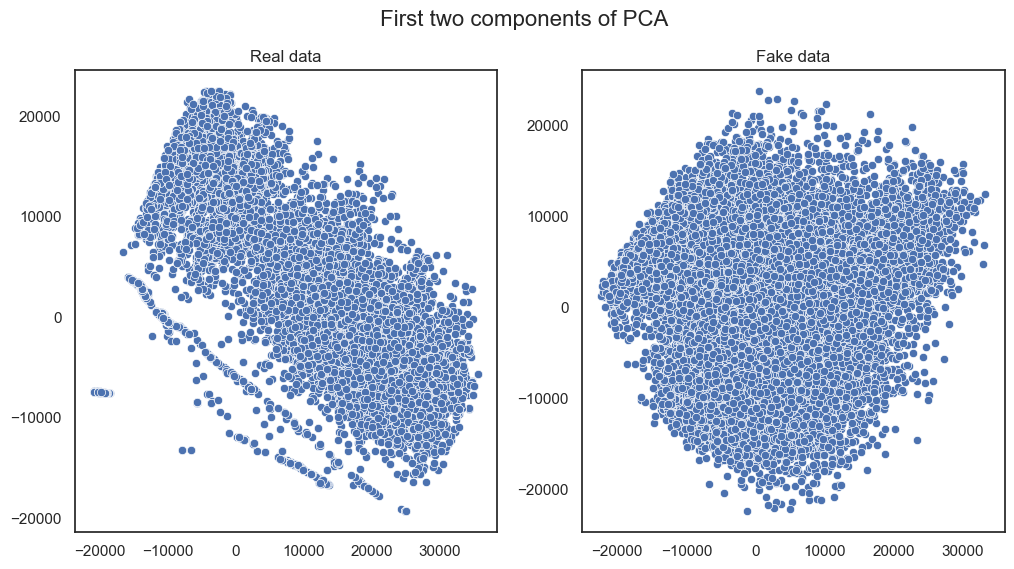

In [96]:
from table_evaluator import load_data, TableEvaluator

table_evaluator =  TableEvaluator(attack_ai_data, normal_original_data)

table_evaluator.visual_evaluation()

In [97]:
import pandas as pd

dataV=dataIFeatures
dataV['Label']=DataITarget['TType']
dataV

Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0         2149         5             75             1             0   
1          421         4           1394             1             1   
2         1532         4            141             0             2   
3         1532         4            151             0             1   
4          802         5            153             2             0   
...        ...       ...            ...           ...           ...   
5995      3380         4            271             1             0   
5996      3356         4            303             3             0   
5997      3339         4            102             1             0   
5998       705         4            193             0             0   
5999      3353         4            208             2             1   

      TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                 664              819              518              635   
1                   0                0                0                0   
2                   0             1253                0                0   
3                   0             1225                0                0   
4                 612              356              325              333   
...               ...              ...              ...              ...   
5995              853              777              696              832   
5996             1472              785              696               28   
5997                0              773              699              823   
5998               15               46                5                2   
5999              832              784              697              829   

      Fwd_Pkt_Len_Mean  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0                 6122  ...                 0            0           0   
1                    0  ...                 0            0           0   
2                    0  ...                 0            0           0   
3                    0  ...                 0            0           0   
4                 4617  ...                 0            0           0   
...                ...  ...               ...          ...         ...   
5995              5175  ...                 0            0           0   
5996              5029  ...                 0            0           0   
5997              8231  ...                 0            0           0   
5998              1598  ...                 0            0           0   
5999              8307  ...                 0            0           0   

      Active_Max  Active_Min  Idle_Mean  Idle_Std  Idle_Max  Idle_Min  \
0              0           0       2404         0        75        75   
1              0           0      12725     11292      1172       571   
2              0           0       2202      1753        71        70   
3              0           0       6259         0       151       151   
4              0           0       2515      1753        77        76   
...          ...         ...        ...       ...       ...       ...   
5995           0           0       9547         0       265       122   
5996           0           0       2697      6037       230        78   
5997           0           0       3974      1333        79        72   
5998           0           0       3949      5319        87        79   
5999           0           0       8267      1055       185       175   

                    Label  
0     IoT_Attack_Original  
1     IoT_Attack_Original  
2     IoT_Attack_Original  
3     IoT_Attack_Original  
4     IoT_Attack_Original  
...                   ...  
5995        IoT_Normal_AI  
5996        IoT_Normal_AI  
5997        IoT_Normal_AI  
5998        IoT_Normal_AI  
5999        IoT_Normal_AI  

[36000 rows x 79 columns]

In [98]:


# Create a DataFrame for rows containing 'AI' in 'IoT_Attack_AI'
attack_ai_data = dataV[~dataV['Label'].str.contains('AI', case=False, na=False)]

# Create a DataFrame for rows not containing 'AI' in 'IoT_Attack_AI'
normal_original_data = dataV[~dataV['Label'].str.contains('Original', case=False, na=False)]

# Now, 'attack_ai_data' contains rows where 'IoT_Attack_AI' contains 'AI',
# and 'normal_original_data' contains rows where 'IoT_Attack_AI' does not contain 'AI'


In [99]:
attack_ai_data=attack_ai_data.drop('Label',axis=1)
normal_original_data=normal_original_data.drop('Label',axis=1)

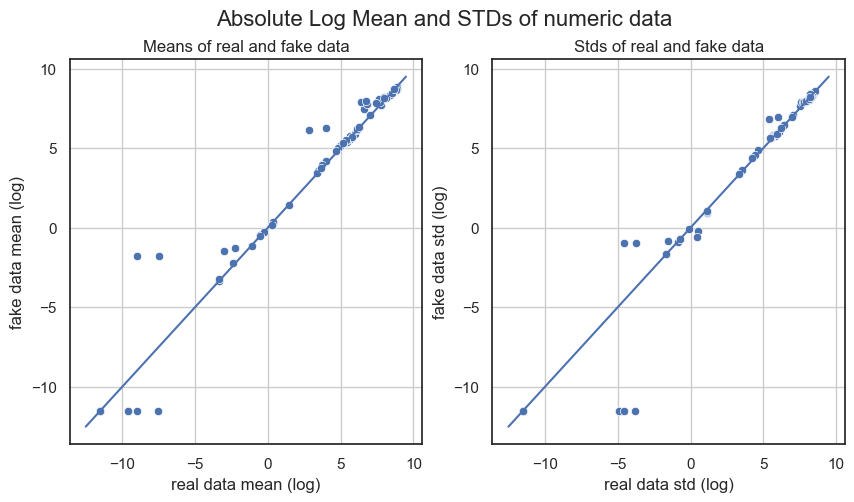

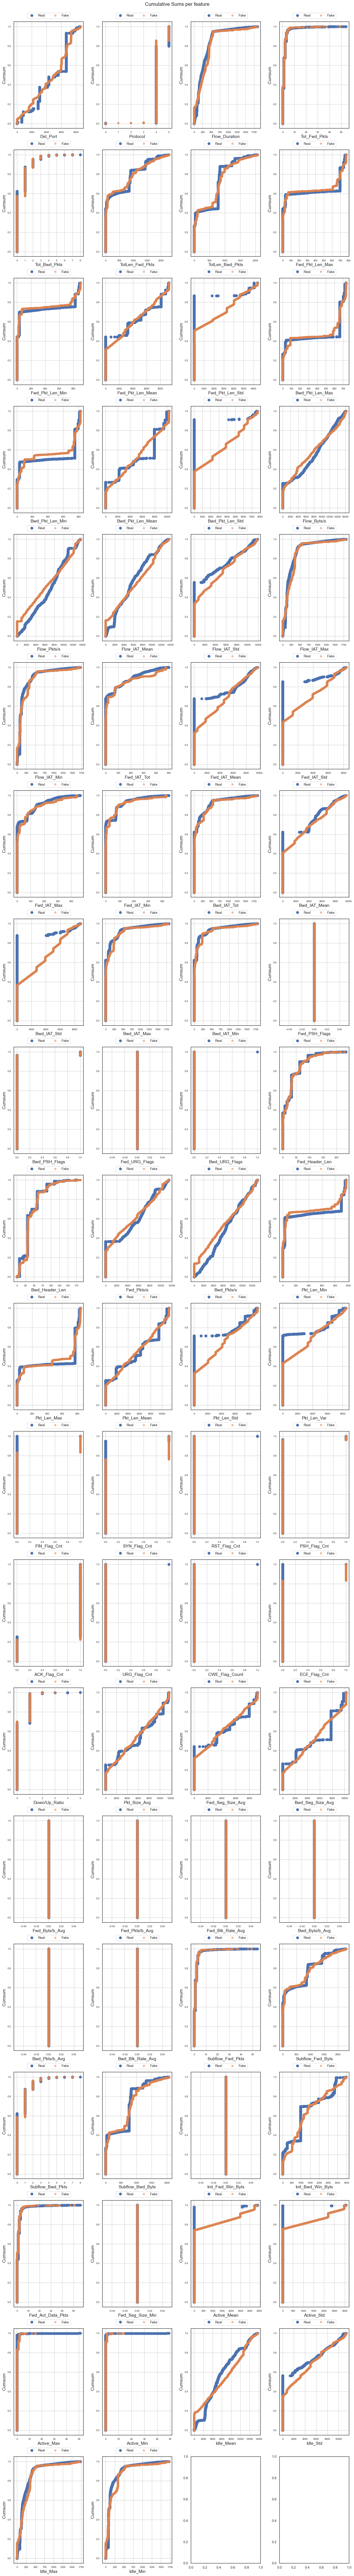

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['r

C:\Users\knowl\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})


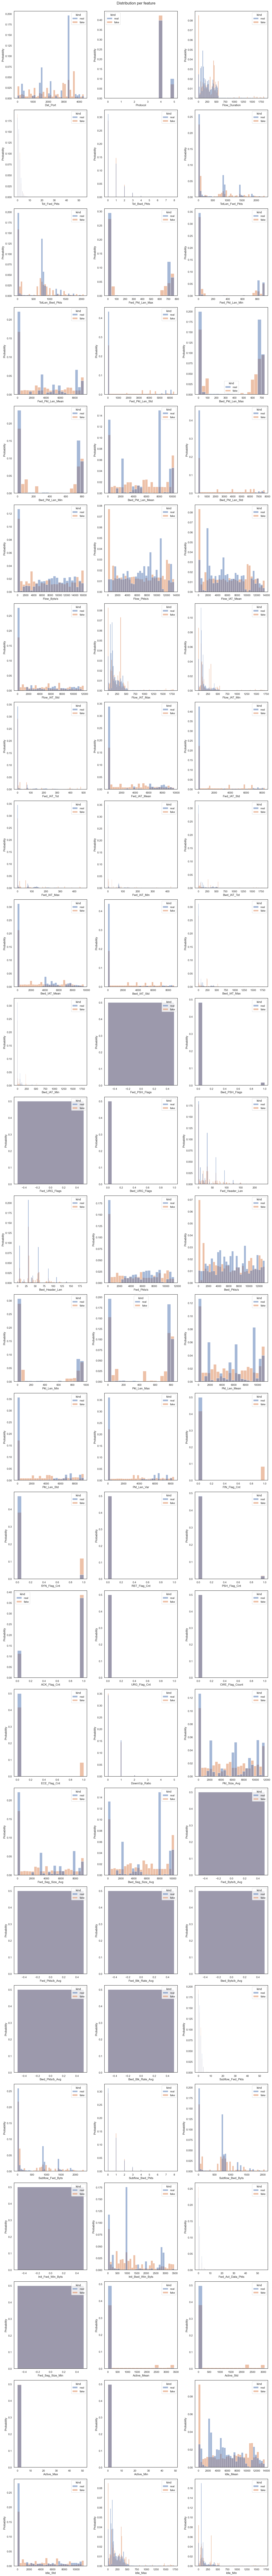

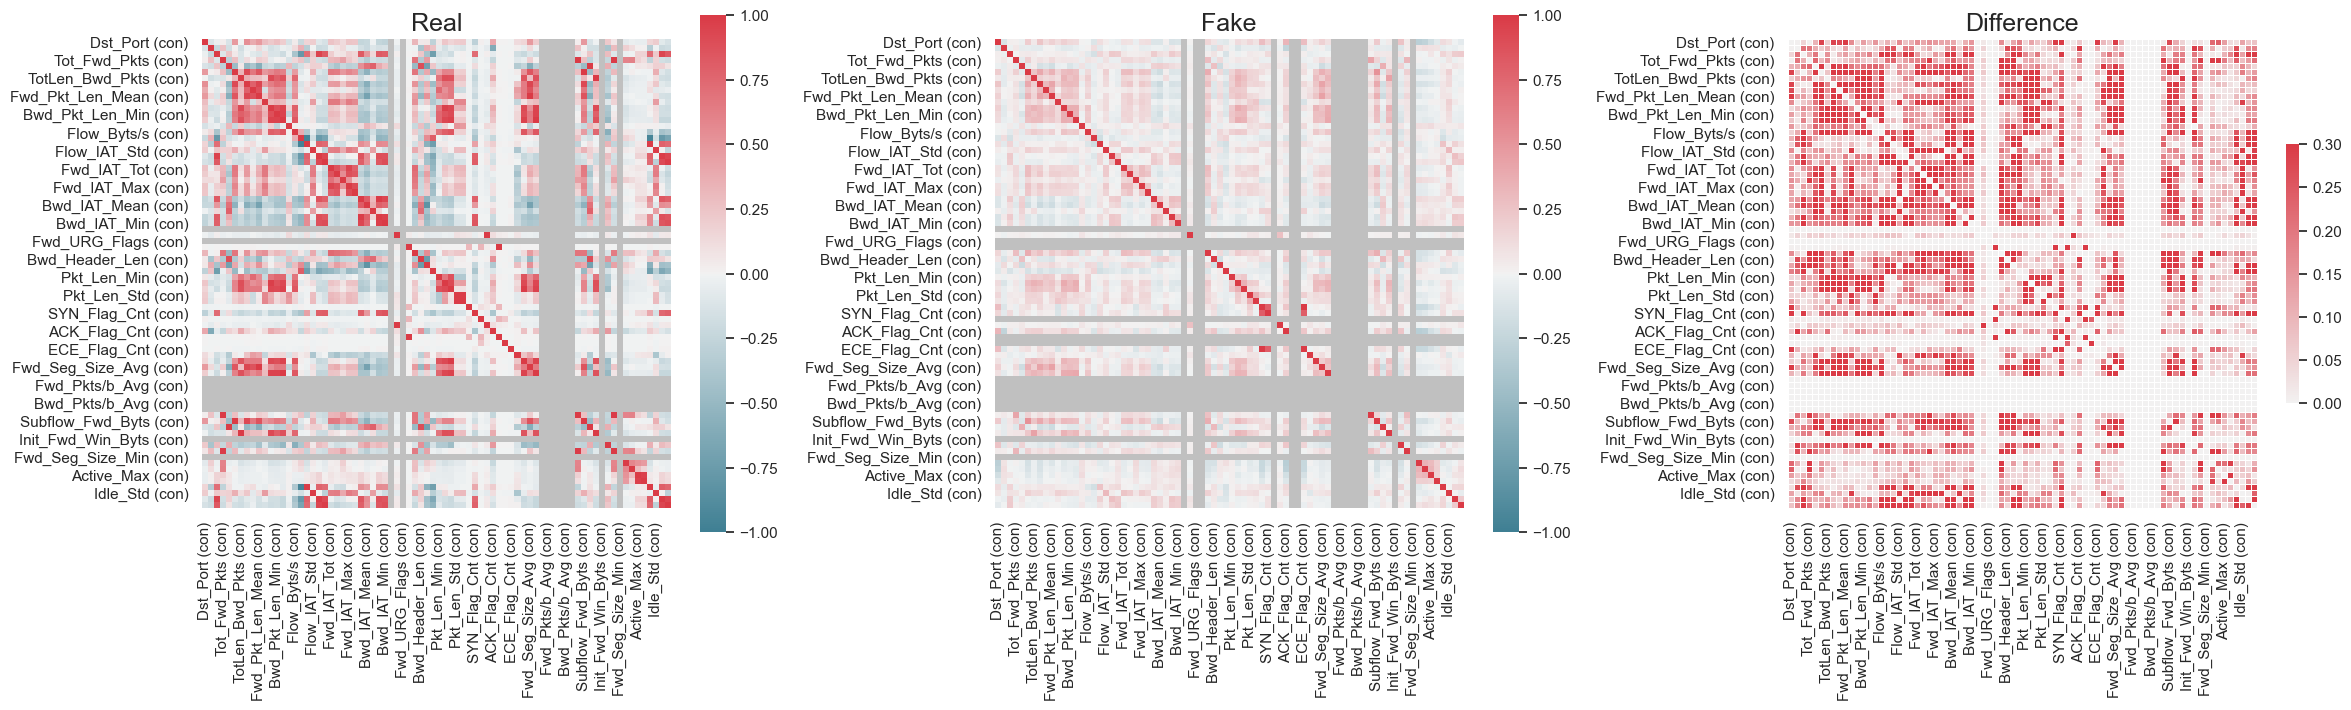

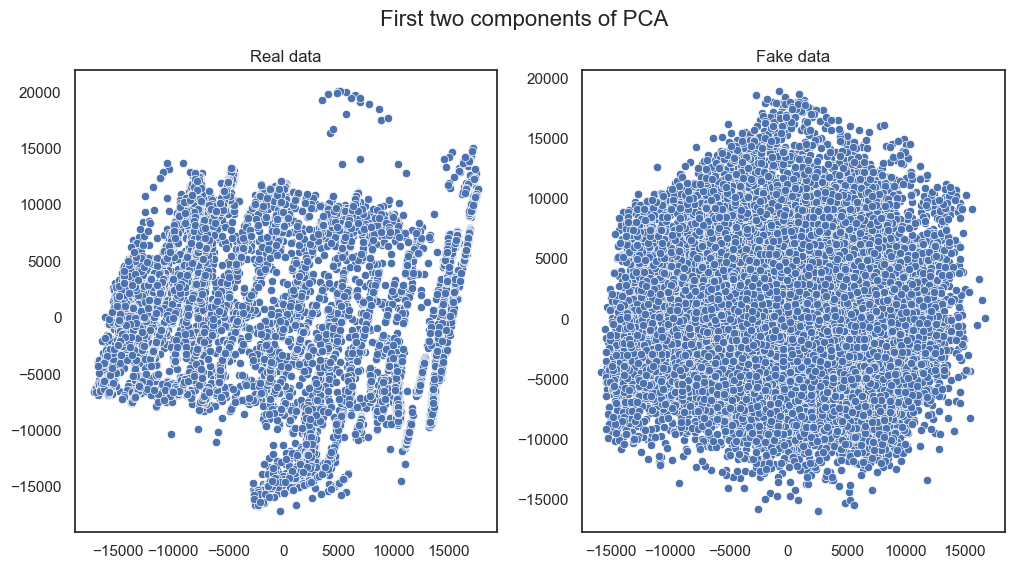

In [100]:
from table_evaluator import load_data, TableEvaluator

table_evaluator =  TableEvaluator(attack_ai_data, normal_original_data)

table_evaluator.visual_evaluation()

In [96]:
newfeatures

0         1          2         3          4         5  \
0      2.575934  3.406518   0.985877  2.513286   2.078901  3.340337   
1      5.931482  0.000000  10.971255  2.098810   6.063824  0.000000   
2      7.631672  1.608854   3.147973  2.570775   3.053615  2.594648   
3      6.255082  5.588604   0.840216  1.248374  12.751494  0.000000   
4      7.257213  0.000000   8.751850  0.000000   1.409395  2.059135   
...         ...       ...        ...       ...        ...       ...   
71995  6.043698  3.883302   4.370098  8.787928   3.794796  2.172833   
71996  1.715257  5.243652   1.754775  2.692273   2.333793  0.000000   
71997  3.588332  0.000000   0.886069  5.245164   2.333912  0.000000   
71998  5.336609  4.800036   2.111762  6.292850   3.285184  1.370703   
71999  5.985069  0.527971   2.974794  7.531581   4.078068  2.433673   

               6         7          8         9  ...        23         24  \
0       3.574777  1.735507   0.000000  1.391206  ...  0.000000   3.563121   
1       4.606017  4.033393   3.616107  7.525082  ...  0.177690   3.725625   
2       5.070499  8.079039   8.482161  5.669112  ...  2.857120   7.762401   
3       0.000000  8.868077   9.806497  3.169620  ...  1.836059   9.094900   
4      14.172281  2.947287  11.424707  4.974127  ...  4.115703  10.360476   
...          ...       ...        ...       ...  ...       ...        ...   
71995   3.551379  4.349073   4.539538  7.567385  ...  8.156714   2.998220   
71996   2.008982  2.124412   3.651036  3.713877  ...  8.150002   2.756553   
71997   0.736447  6.151850   2.940325  2.317925  ...  3.590051   1.684233   
71998   2.908315  7.427112   3.205659  0.312383  ...  2.807633   2.121051   
71999   3.671442  3.829103   4.898558  4.004702  ...  7.882172   2.995757   

             25        26        27        28         29        30        31  \
0      1.688389  0.000000  4.559227  3.645957   0.803725  2.481606  0.000000   
1      0.000000  1.962852  2.518312  9.314289   7.468658  2.081278  3.813298   
2      2.901831  1.547878  2.934650  5.863956   8.562422  1.639403  2.305050   
3      3.149242  8.919035  4.037540  2.245236   5.125553  8.551779  0.707842   
4      7.574772  5.995200  0.000000  7.761070  11.568981  0.000000  5.964283   
...         ...       ...       ...       ...        ...       ...       ...   
71995  4.887293  4.475481  7.937799  2.353642   4.231275  6.734046  3.111127   
71996  4.026357  2.741603  6.134460  3.766453   3.289139  5.593276  2.282023   
71997  1.687857  2.130371  4.279153  1.065848   2.581122  6.231813  0.564298   
71998  3.589939  1.064016  2.446679  5.249454   6.407229  3.846857  3.692861   
71999  2.621241  3.192219  5.135487  2.881075   1.894029  7.507997  3.106174   

                      target  
0      Tr_IP_Normal_Original  
1      Tr_IP_Normal_Original  
2      Tr_IP_Normal_Original  
3      Tr_IP_Normal_Original  
4      Tr_IP_Normal_Original  
...                      ...  
71995          IoT_Normal_AI  
71996          IoT_Normal_AI  
71997          IoT_Normal_AI  
71998          IoT_Normal_AI  
71999          IoT_Normal_AI  

[72000 rows x 33 columns]

In [100]:


# Create a DataFrame for rows containing 'AI' in 'IoT_Attack_AI'
Notmal_data = newfeatures[~newfeatures['target'].str.contains('Normal', case=False, na=False)]

# Create a DataFrame for rows not containing 'AI' in 'IoT_Attack_AI'
Attack_data = newfeatures[~newfeatures['target'].str.contains('Attack', case=False, na=False)]

# Now, 'attack_ai_data' contains rows where 'IoT_Attack_AI' contains 'AI',
# and 'normal_original_data' contains rows where 'IoT_Attack_AI' does not contain 'AI'


In [101]:
Attack_data['Label']='Normal'
Notmal_data['Label']='Attack'

C:\Users\knowl\AppData\Local\Temp\ipykernel_53000\1870822925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attack_data['Label']='Normal'
C:\Users\knowl\AppData\Local\Temp\ipykernel_53000\1870822925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Notmal_data['Label']='Attack'


In [102]:
newtarget1=Attack_data.append(Notmal_data,ignore_index = True)
newtarget1

C:\Users\knowl\AppData\Local\Temp\ipykernel_53000\3562757025.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newtarget1=Attack_data.append(Notmal_data,ignore_index = True)


0         1          2         3          4         5  \
0      2.575934  3.406518   0.985877  2.513286   2.078901  3.340337   
1      5.931482  0.000000  10.971255  2.098810   6.063824  0.000000   
2      7.631672  1.608854   3.147973  2.570775   3.053615  2.594648   
3      6.255082  5.588604   0.840216  1.248374  12.751494  0.000000   
4      7.257213  0.000000   8.751850  0.000000   1.409395  2.059135   
...         ...       ...        ...       ...        ...       ...   
71995  6.676207  5.845216   7.702084  2.020207   3.908075  4.982118   
71996  9.516888  3.826580   9.854139  1.152374   6.223084  5.924468   
71997  1.682850  3.646226   6.891712  2.760752   2.898807  7.016479   
71998  3.531715  1.979553   0.603251  7.254119   0.225941  0.081861   
71999  8.065901  3.370259  10.912777  1.840111   8.205169  6.723754   

               6         7          8         9  ...         24        25  \
0       3.574777  1.735507   0.000000  1.391206  ...   3.563121  1.688389   
1       4.606017  4.033393   3.616107  7.525082  ...   3.725625  0.000000   
2       5.070499  8.079039   8.482161  5.669112  ...   7.762401  2.901831   
3       0.000000  8.868077   9.806497  3.169620  ...   9.094900  3.149242   
4      14.172281  2.947287  11.424707  4.974127  ...  10.360476  7.574772   
...          ...       ...        ...       ...  ...        ...       ...   
71995   5.218060  2.365539   5.171510  3.483647  ...   6.699926  3.449755   
71996   3.936431  1.185408   3.897651  4.579727  ...   6.664288  4.435948   
71997   3.266260  4.488279   5.087629  3.653293  ...   3.566340  4.371514   
71998   2.129383  7.300228   1.307052  1.599117  ...   3.440982  4.631056   
71999   6.634532  2.223670   4.770312  4.178780  ...   9.429360  7.253635   

              26        27        28         29        30        31  \
0       0.000000  4.559227  3.645957   0.803725  2.481606  0.000000   
1       1.962852  2.518312  9.314289   7.468658  2.081278  3.813298   
2       1.547878  2.934650  5.863956   8.562422  1.639403  2.305050   
3       8.919035  4.037540  2.245236   5.125553  8.551779  0.707842   
4       5.995200  0.000000  7.761070  11.568981  0.000000  5.964283   
...          ...       ...       ...        ...       ...       ...   
71995   8.356317  3.429110  7.685616   6.212488  3.745437  2.965669   
71996   9.484610  2.094959  7.630693   4.364932  1.487025  9.754629   
71997   1.383489  1.701033  4.581104   6.036172  2.934471  3.767940   
71998   1.183196  6.284010  0.000000   6.966209  4.277598  1.937082   
71999  10.374922  3.980754  6.312181   4.168796  2.085211  9.958586   

                      target   Label  
0      Tr_IP_Normal_Original  Normal  
1      Tr_IP_Normal_Original  Normal  
2      Tr_IP_Normal_Original  Normal  
3      Tr_IP_Normal_Original  Normal  
4      Tr_IP_Normal_Original  Normal  
...                      ...     ...  
71995          IoT_Attack_AI  Attack  
71996          IoT_Attack_AI  Attack  
71997          IoT_Attack_AI  Attack  
71998          IoT_Attack_AI  Attack  
71999          IoT_Attack_AI  Attack  

[72000 rows x 34 columns]

In [103]:
newtarget1.drop('target', axis=1, inplace=True)

In [104]:
target1=newtarget1['Label']
feature1=newtarget1.drop('Label',axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(feature1, target1, test_size=0.15, random_state=1, stratify=target1, shuffle=True)
    

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=100) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
a=accuracy_score(y_test,pred)
print(a)

0.982037037037037
              precision    recall  f1-score   support

      Attack       0.98      0.98      0.98      5400
      Normal       0.98      0.98      0.98      5400

    accuracy                           0.98     10800
   macro avg       0.98      0.98      0.98     10800
weighted avg       0.98      0.98      0.98     10800

[[5315   85]
 [ 109 5291]]
0.982037037037037


In [135]:
from sklearn.neighbors import KNeighborsClassifier
print('KNN')
neigh = KNeighborsClassifier(n_neighbors=2)
xgb_pred = neigh.fit(X_train, y_train).predict(X_test)  
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
a=accuracy_score(y_test,xgb_pred)
print(a)

KNN


C:\Users\knowl\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98      5400
      Normal       0.99      0.97      0.98      5400

    accuracy                           0.98     10800
   macro avg       0.98      0.98      0.98     10800
weighted avg       0.98      0.98      0.98     10800

[[5329   71]
 [ 168 5232]]
0.9778703703703704


In [136]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
b = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=100)
b_pred = b.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,b_pred))
print(confusion_matrix(y_test,b_pred))
a=accuracy_score(y_test,b_pred)
print(a)

ETC
              precision    recall  f1-score   support

      Attack       0.98      0.98      0.98      5400
      Normal       0.98      0.98      0.98      5400

    accuracy                           0.98     10800
   macro avg       0.98      0.98      0.98     10800
weighted avg       0.98      0.98      0.98     10800

[[5315   85]
 [  99 5301]]
0.9829629629629629


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 2. instantiate a logistic regression model
logreg = LogisticRegression(random_state=1000, solver='liblinear',multi_class='ovr',C=3.0)
# 3. train the model using X_train_dtm
x=logreg.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))
a=accuracy_score(y_test,y_pred_class)
print(a)

              precision    recall  f1-score   support

      Attack       0.97      0.97      0.97      5400
      Normal       0.97      0.97      0.97      5400

    accuracy                           0.97     10800
   macro avg       0.97      0.97      0.97     10800
weighted avg       0.97      0.97      0.97     10800

[[5245  155]
 [ 157 5243]]
0.9711111111111111


In [156]:
def conf_matrix(an, title):
    fig, ax =plt.subplots(figsize=(4,4),dpi=300)
    labels=['Anomaly', 'Normal']
    ax=sns.heatmap(an, annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    #plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.savefig('conRF2Class.pdf')

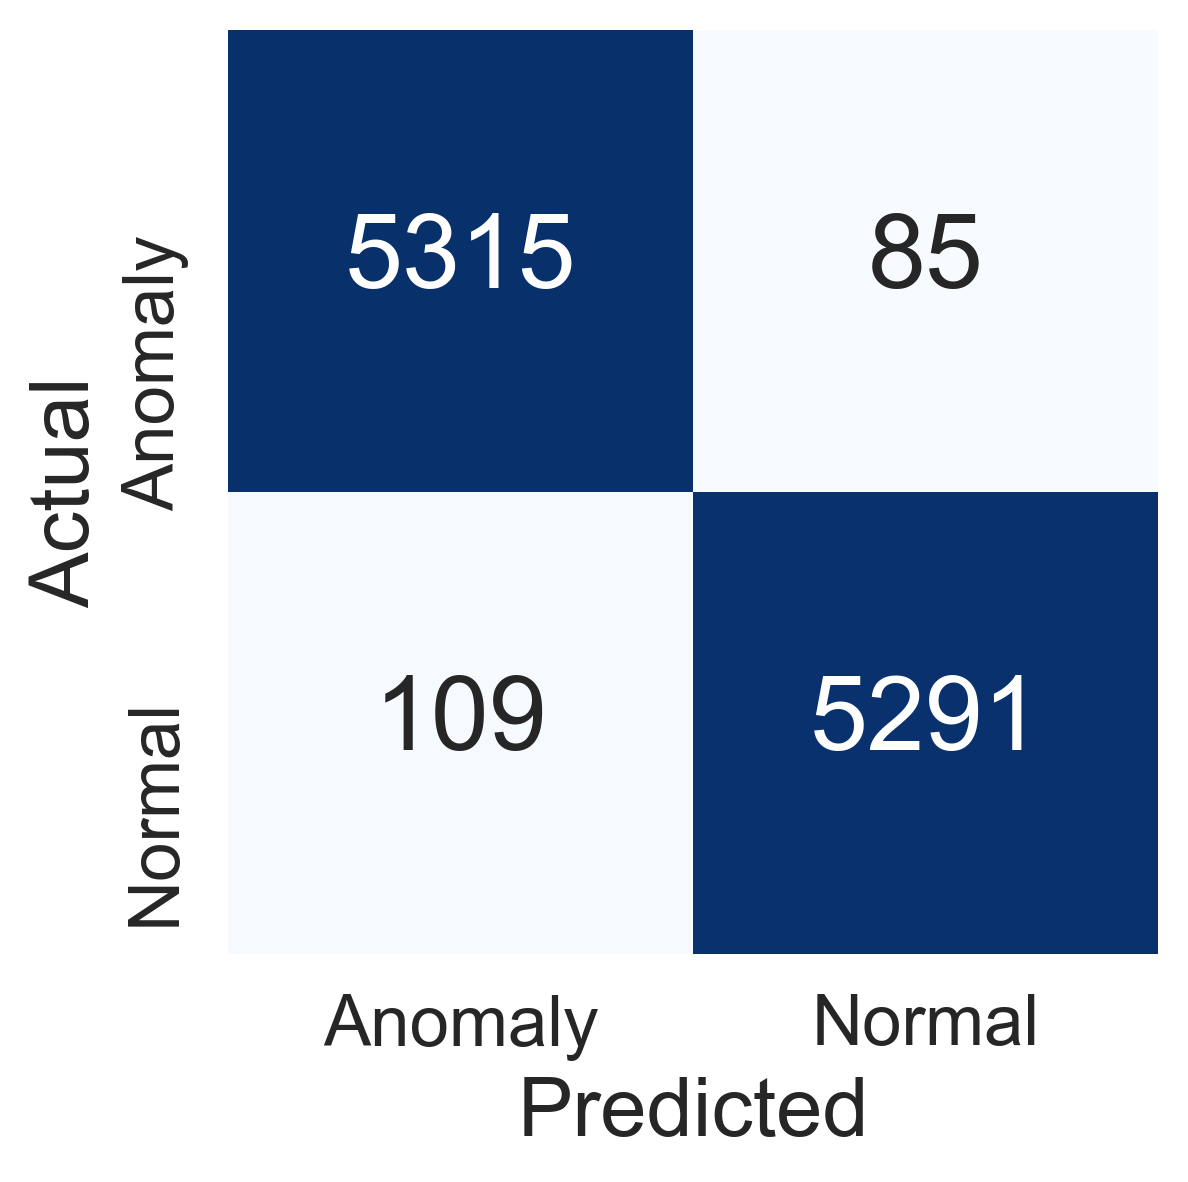

In [157]:
array6 = [[5315,   85],
 [ 109, 5291]]
conf_matrix(array6, 'RF')

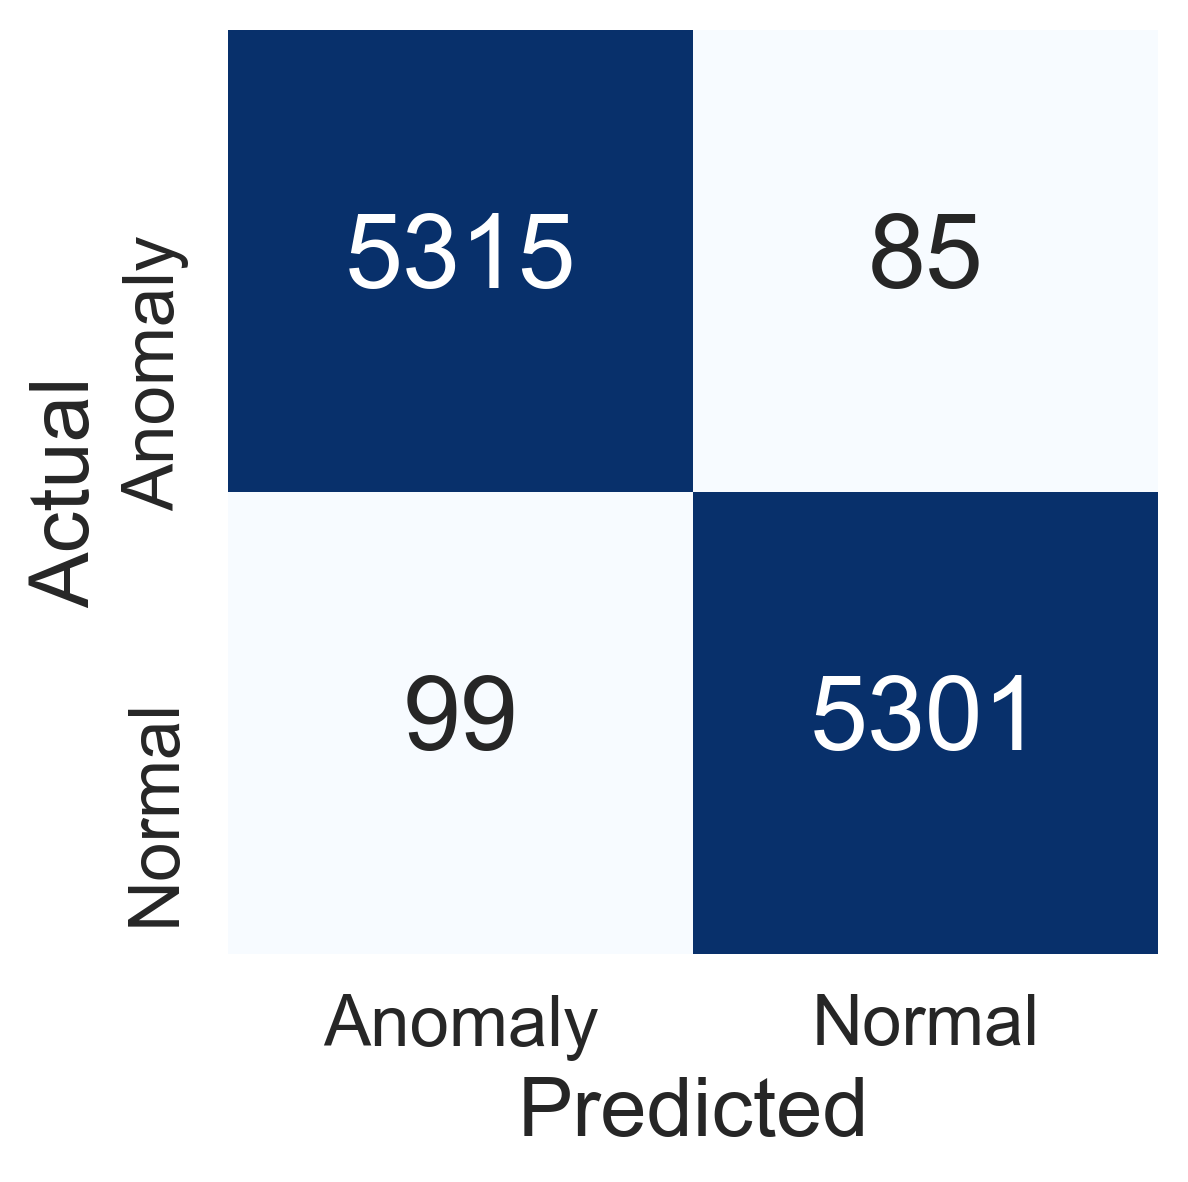

In [158]:
def conf_matrix(an, title):
    fig, ax =plt.subplots(figsize=(4,4),dpi=300)
    labels=['Anomaly', 'Normal']
    ax=sns.heatmap(an, annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    #plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.savefig('conETC2Class.pdf')
array6 =[[5315,   85],
 [  99, 5301]]
conf_matrix(array6, 'ETC')

In [106]:
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical


# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)

y1 = to_categorical(y_train)
y2 = to_categorical(y_test)


# Create a Sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(256))

# Add output layer
model.add(Dense(2, activation='sigmoid'))  # For binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y1, epochs=20, batch_size=32, validation_data=(X_test, y2))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y2)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.2514 - accuracy: 0.9033 - val_loss: 0.1603 - val_accuracy: 0.9418
Epoch 2/20
1913/1913 [==============================] - 32s 17ms/step - loss: 0.1732 - accuracy: 0.9334 - val_loss: 0.1525 - val_accuracy: 0.9421
Epoch 3/20
1913/1913 [==============================] - 32s 16ms/step - loss: 0.1621 - accuracy: 0.9394 - val_loss: 0.1253 - val_accuracy: 0.9527
Epoch 4/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.1439 - accuracy: 0.9447 - val_loss: 0.1282 - val_accuracy: 0.9481
Epoch 5/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1451 - accuracy: 0.9461 - val_loss: 0.1284 - val_accuracy: 0.9569
Epoch 6/20
1913/1913 [==============================] - 32s 17ms/step - loss: 0.1380 - accuracy: 0.9481 - val_loss: 0.1473 - val_accuracy: 0.9479
Epoch 7/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1351 - accuracy: 0.9492 - val_loss: 0.1348 -

In [107]:
y_pred_class = model.predict(X_test)
y_pred_class=np.argmax(y_pred_class,axis=1)
ys=np.argmax(y2,axis=1)

print(classification_report(ys,y_pred_class))
print(confusion_matrix(ys,y_pred_class))
a=accuracy_score(ys,y_pred_class)
print(a)

338/338 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5400
           1       0.90      0.99      0.94      5400

    accuracy                           0.94     10800
   macro avg       0.94      0.94      0.94     10800
weighted avg       0.94      0.94      0.94     10800

[[4797  603]
 [  47 5353]]
0.9398148148148148


In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Generate synthetic data (replace with your real dataset)
num_samples = len(X_train)
seq_length = 32
num_features = 1  # Assuming you have one feature per time step


# Define the model
input_layer = Input(shape=(seq_length, num_features))
conv1 = Conv1D(512, kernel_size=3, activation='relu')(input_layer)
maxpool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(256, kernel_size=3, activation='relu')(maxpool1)
maxpool2 = MaxPooling1D(pool_size=2)(conv2)
global_maxpool = GlobalMaxPooling1D()(maxpool2)
flatten=Flatten()(global_maxpool)
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(2, activation='sigmoid')(dense2)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y1, epochs=20, batch_size=32, validation_data=(X_test, y2))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y2)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/20
1913/1913 [==============================] - 39s 20ms/step - loss: 0.4336 - accuracy: 0.7883 - val_loss: 0.3506 - val_accuracy: 0.8368
Epoch 2/20
1913/1913 [==============================] - 40s 21ms/step - loss: 0.3104 - accuracy: 0.8538 - val_loss: 0.2906 - val_accuracy: 0.8664
Epoch 3/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.2806 - accuracy: 0.8700 - val_loss: 0.2971 - val_accuracy: 0.8562
Epoch 4/20
1913/1913 [==============================] - 37s 19ms/step - loss: 0.2622 - accuracy: 0.8802 - val_loss: 0.2602 - val_accuracy: 0.8814
Epoch 5/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.2475 - accuracy: 0.8849 - val_loss: 0.2627 - val_accuracy: 0.8790
Epoch 6/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.2364 - accuracy: 0.8927 - val_loss: 0.2558 - val_accuracy: 0.8827
Epoch 7/20
1913/1913 [==============================] - 37s 19ms/step - loss: 0.2252 - accuracy: 0.8981 - val_loss: 0.2448 -

In [110]:
y_pred_class = model.predict(X_test)
y_pred_class=np.argmax(y_pred_class,axis=1)
ys=np.argmax(y2,axis=1)

print(classification_report(ys,y_pred_class))
print(confusion_matrix(ys,y_pred_class))
a=accuracy_score(ys,y_pred_class)
print(a)

338/338 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5400
           1       0.91      0.89      0.90      5400

    accuracy                           0.90     10800
   macro avg       0.90      0.90      0.90     10800
weighted avg       0.90      0.90      0.90     10800

[[4922  478]
 [ 612 4788]]
0.899074074074074


In [24]:
# Python program to demonstrate how to
# perform two sample T-test

# Import the library
import scipy.stats as stats

# Creating data groups
data_group1 = np.array([ 0.990, 0.993,  0.986, 0.990])

data_group2 = np.array([0.991, 0.992, 0.990,0.991])



In [25]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

# seed the random number generator
seed(1)
# generate two independent samples
data1 = np.array([ 0.990, 0.993,  0.986, 0.990])
data2 = np.array([ 0.990, 0.993,  0.986, 0.990])
# calculate the t test
alpha = 0.5
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-0.837, df=6, cv=0.000, p=0.435
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this string with your actual data
data = '''
Epoch 1/20
1913/1913 [==============================] - 28s 14ms/step - loss: 0.6194 - accuracy: 0.7655 - val_loss: 0.3365 - val_accuracy: 0.8764
Epoch 2/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.4443 - accuracy: 0.8358 - val_loss: 0.3045 - val_accuracy: 0.8921
Epoch 3/20
1913/1913 [==============================] - 30s 15ms/step - loss: 0.4379 - accuracy: 0.8439 - val_loss: 0.3884 - val_accuracy: 0.8800
Epoch 4/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.4020 - accuracy: 0.8555 - val_loss: 0.2626 - val_accuracy: 0.9044
Epoch 5/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3776 - accuracy: 0.8663 - val_loss: 0.2977 - val_accuracy: 0.8924
Epoch 6/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3779 - accuracy: 0.8679 - val_loss: 0.2566 - val_accuracy: 0.9175
Epoch 7/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.3644 - accuracy: 0.8756 - val_loss: 0.2474 - val_accuracy: 0.9128
Epoch 8/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3742 - accuracy: 0.8718 - val_loss: 0.2503 - val_accuracy: 0.9231
Epoch 9/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3519 - accuracy: 0.8821 - val_loss: 0.2421 - val_accuracy: 0.9254
Epoch 10/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3526 - accuracy: 0.8829 - val_loss: 0.2225 - val_accuracy: 0.9296
Epoch 11/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3527 - accuracy: 0.8836 - val_loss: 0.2409 - val_accuracy: 0.9219
Epoch 12/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3621 - accuracy: 0.8792 - val_loss: 0.2794 - val_accuracy: 0.9167
Epoch 13/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3652 - accuracy: 0.8810 - val_loss: 0.2439 - val_accuracy: 0.9270
Epoch 14/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.3505 - accuracy: 0.8870 - val_loss: 0.2783 - val_accuracy: 0.9110
Epoch 15/20
1913/1913 [==============================] - 30s 15ms/step - loss: 0.3473 - accuracy: 0.8868 - val_loss: 0.2404 - val_accuracy: 0.9290
Epoch 16/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.3462 - accuracy: 0.8884 - val_loss: 0.2697 - val_accuracy: 0.9126
Epoch 17/20
1913/1913 [==============================] - 30s 15ms/step - loss: 0.3885 - accuracy: 0.8754 - val_loss: 0.2536 - val_accuracy: 0.9106
Epoch 18/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3610 - accuracy: 0.8831 - val_loss: 0.2467 - val_accuracy: 0.9263
Epoch 19/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.3526 - accuracy: 0.8890 - val_loss: 0.2533 - val_accuracy: 0.9272
Epoch 20/20
1913/1913 [==============================] - 32s 16ms/step - loss: 0.3545 - accuracy: 0.8869 - val_loss: 0.2191 - val_accuracy: 0.9306
'''

# Initialize lists to store training and validation loss and accuracy values
train_loss_valuesD = []
train_accuracy_valuesD = []
val_loss_valuesD = []
val_accuracy_valuesD = []

# Split the data into lines
lines = data.split('\n')

# Iterate through each line and extract loss and accuracy values
for line in lines:
    if "loss:" in line and "accuracy:" in line and "val_loss:" in line and "val_accuracy:" in line:
        parts = line.split(' - ')
        train_loss = float(parts[2].split(': ')[1])
        train_accuracy = float(parts[3].split(': ')[1])
        val_loss = float(parts[4].split(': ')[1])
        val_accuracy = float(parts[5].split(': ')[1])
        train_loss_valuesD.append(train_loss)
        train_accuracy_valuesD.append(train_accuracy)
        val_loss_valuesD.append(val_loss)
        val_accuracy_valuesD.append(val_accuracy)

# Create x values (epochs)
epochs = range(1, len(train_loss_values) + 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this string with your actual data
data = '''
Epoch 1/20 1913/1913 [==============================] - 153s 80ms/step - loss: 0.8844 - accuracy: 0.6638 - val_loss: 0.5989 - val_accuracy: 0.7774
Epoch 2/20 1913/1913 [==============================] - 184s 96ms/step - loss: 0.5490 - accuracy: 0.7971 - val_loss: 0.4960 - val_accuracy: 0.8147
Epoch 3/20 1913/1913 [==============================] - 186s 97ms/step - loss: 0.4714 - accuracy: 0.8249 - val_loss: 0.4441 - val_accuracy: 0.8350
Epoch 4/20 1913/1913 [==============================] - 187s 98ms/step - loss: 0.4232 - accuracy: 0.8442 - val_loss: 0.4327 - val_accuracy: 0.8381
Epoch 5/20 1913/1913 [==============================] - 202s 106ms/step - loss: 0.3867 - accuracy: 0.8574 - val_loss: 0.4022 - val_accuracy: 0.8517
Epoch 6/20 1913/1913 [==============================] - 184s 96ms/step - loss: 0.3629 - accuracy: 0.8663 - val_loss: 0.3709 - val_accuracy: 0.8637
Epoch 7/20 1913/1913 [==============================] - 183s 95ms/step - loss: 0.3418 - accuracy: 0.8744 - val_loss: 0.3793 - val_accuracy: 0.8589
Epoch 8/20 1913/1913 [==============================] - 198s 103ms/step - loss: 0.3254 - accuracy: 0.8808 - val_loss: 0.3761 - val_accuracy: 0.8655
Epoch 9/20 1913/1913 [==============================] - 196s 102ms/step - loss: 0.3098 - accuracy: 0.8861 - val_loss: 0.3468 - val_accuracy: 0.8757
Epoch 10/20 1913/1913 [==============================] - 174s 91ms/step - loss: 0.3013 - accuracy: 0.8893 - val_loss: 0.3411 - val_accuracy: 0.8761
Epoch 11/20 1913/1913 [==============================] - 176s 92ms/step - loss: 0.2857 - accuracy: 0.8949 - val_loss: 0.3350 - val_accuracy: 0.8782
Epoch 12/20 1913/1913 [==============================] - 170s 89ms/step - loss: 0.2760 - accuracy: 0.8994 - val_loss: 0.3299 - val_accuracy: 0.8797
Epoch 13/20 1913/1913 [==============================] - 164s 86ms/step - loss: 0.2662 - accuracy: 0.9014 - val_loss: 0.3420 - val_accuracy: 0.8788
Epoch 14/20 1913/1913 [==============================] - 190s 99ms/step - loss: 0.2618 - accuracy: 0.9022 - val_loss: 0.3113 - val_accuracy: 0.8841
Epoch 15/20 1913/1913 [==============================] - 181s 94ms/step - loss: 0.2526 - accuracy: 0.9069 - val_loss: 0.3165 - val_accuracy: 0.8869
Epoch 16/20 1913/1913 [==============================] - 171s 90ms/step - loss: 0.2472 - accuracy: 0.9086 - val_loss: 0.3256 - val_accuracy: 0.8803
Epoch 17/20 1913/1913 [==============================] - 170s 89ms/step - loss: 0.2380 - accuracy: 0.9116 - val_loss: 0.3159 - val_accuracy: 0.8871
Epoch 18/20 1913/1913 [==============================] - 156s 81ms/step - loss: 0.2327 - accuracy: 0.9137 - val_loss: 0.3115 - val_accuracy: 0.8882
Epoch 19/20 1913/1913 [==============================] - 147s 77ms/step - loss: 0.2290 - accuracy: 0.9154 - val_loss: 0.3183 - val_accuracy: 0.8865
Epoch 20/20 1913/1913 [==============================] - 147s 77ms/step - loss: 0.2212 - accuracy: 0.9182 - val_loss: 0.3094 - val_accuracy: 0.8890
'''

# Initialize lists to store training and validation loss and accuracy values
train_loss_values = []
train_accuracy_values = []
val_loss_values = []
val_accuracy_values = []

# Split the data into lines
lines = data.split('\n')

# Iterate through each line and extract loss and accuracy values
for line in lines:
    if "loss:" in line and "accuracy:" in line and "val_loss:" in line and "val_accuracy:" in line:
        parts = line.split(' - ')
        train_loss = float(parts[2].split(': ')[1])
        train_accuracy = float(parts[3].split(': ')[1])
        val_loss = float(parts[4].split(': ')[1])
        val_accuracy = float(parts[5].split(': ')[1])
        train_loss_values.append(train_loss)
        train_accuracy_values.append(train_accuracy)
        val_loss_values.append(val_loss)
        val_accuracy_values.append(val_accuracy)

# Create x values (epochs)
epochs = range(1, len(train_loss_values) + 1)

# Increase font size for labels, titles, and legends
font_size = 14

# Create loss and accuracy plots
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, 'bo-', label='Training Loss CNN')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss CNN')
plt.plot(epochs, train_loss_valuesD, 'g*-', label='Training Loss DNN')
plt.plot(epochs, val_loss_valuesD, 'm*-', label='Validation Loss DNN')
plt.xlabel('Epochs', fontsize=font_size)
plt.ylabel('Loss', fontsize=font_size)
plt.legend(fontsize=font_size)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_values, 'bo-', label='Training Accuracy CNN')
plt.plot(epochs, val_accuracy_values, 'ro-', label='Validation Accuracy CNN')
plt.plot(epochs, train_accuracy_valuesD, 'g*-', label='Training Accuracy DNN')
plt.plot(epochs, val_accuracy_valuesD, 'm*-', label='Validation Accuracy DNN')
plt.xlabel('Epochs', fontsize=font_size)
plt.ylabel('Accuracy', fontsize=font_size)
plt.legend(fontsize=font_size)

plt.tight_layout()


plt.savefig('MClassLossaccuracy.pdf')

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this string with your actual data
data = '''
Epoch 1/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.2514 - accuracy: 0.9033 - val_loss: 0.1603 - val_accuracy: 0.9418
Epoch 2/20
1913/1913 [==============================] - 32s 17ms/step - loss: 0.1732 - accuracy: 0.9334 - val_loss: 0.1525 - val_accuracy: 0.9421
Epoch 3/20
1913/1913 [==============================] - 32s 16ms/step - loss: 0.1621 - accuracy: 0.9394 - val_loss: 0.1253 - val_accuracy: 0.9527
Epoch 4/20
1913/1913 [==============================] - 29s 15ms/step - loss: 0.1439 - accuracy: 0.9447 - val_loss: 0.1282 - val_accuracy: 0.9481
Epoch 5/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1451 - accuracy: 0.9461 - val_loss: 0.1284 - val_accuracy: 0.9569
Epoch 6/20
1913/1913 [==============================] - 32s 17ms/step - loss: 0.1380 - accuracy: 0.9481 - val_loss: 0.1473 - val_accuracy: 0.9479
Epoch 7/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1351 - accuracy: 0.9492 - val_loss: 0.1348 - val_accuracy: 0.9445
Epoch 8/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.1349 - accuracy: 0.9505 - val_loss: 0.1100 - val_accuracy: 0.9607
Epoch 9/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1308 - accuracy: 0.9524 - val_loss: 0.1198 - val_accuracy: 0.9533
Epoch 10/20
1913/1913 [==============================] - 33s 17ms/step - loss: 0.1326 - accuracy: 0.9507 - val_loss: 0.1156 - val_accuracy: 0.9552
Epoch 11/20
1913/1913 [==============================] - 34s 18ms/step - loss: 0.1313 - accuracy: 0.9530 - val_loss: 0.1633 - val_accuracy: 0.9348
Epoch 12/20
1913/1913 [==============================] - 32s 17ms/step - loss: 0.1303 - accuracy: 0.9519 - val_loss: 0.1270 - val_accuracy: 0.9398
Epoch 13/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.1354 - accuracy: 0.9516 - val_loss: 0.1321 - val_accuracy: 0.9437
Epoch 14/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.1283 - accuracy: 0.9537 - val_loss: 0.1729 - val_accuracy: 0.9088
Epoch 15/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1360 - accuracy: 0.9517 - val_loss: 0.1245 - val_accuracy: 0.9476
Epoch 16/20
1913/1913 [==============================] - 33s 17ms/step - loss: 0.1264 - accuracy: 0.9532 - val_loss: 0.1627 - val_accuracy: 0.9283
Epoch 17/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1309 - accuracy: 0.9524 - val_loss: 0.1094 - val_accuracy: 0.9606
Epoch 18/20
1913/1913 [==============================] - 31s 16ms/step - loss: 0.1262 - accuracy: 0.9544 - val_loss: 0.1215 - val_accuracy: 0.9516
Epoch 19/20
1913/1913 [==============================] - 30s 16ms/step - loss: 0.1305 - accuracy: 0.9542 - val_loss: 0.1346 - val_accuracy: 0.9355
Epoch 20/20
1913/1913 [==============================] - 33s 17ms/step - loss: 0.1259 - accuracy: 0.9540 - val_loss: 0.1373 - val_accuracy: 0.9398
'''

# Initialize lists to store training and validation loss and accuracy values
train_loss_valuesD = []
train_accuracy_valuesD = []
val_loss_valuesD = []
val_accuracy_valuesD = []

# Split the data into lines
lines = data.split('\n')

# Iterate through each line and extract loss and accuracy values
for line in lines:
    if "loss:" in line and "accuracy:" in line and "val_loss:" in line and "val_accuracy:" in line:
        parts = line.split(' - ')
        train_loss = float(parts[2].split(': ')[1])
        train_accuracy = float(parts[3].split(': ')[1])
        val_loss = float(parts[4].split(': ')[1])
        val_accuracy = float(parts[5].split(': ')[1])
        train_loss_valuesD.append(train_loss)
        train_accuracy_valuesD.append(train_accuracy)
        val_loss_valuesD.append(val_loss)
        val_accuracy_valuesD.append(val_accuracy)

# Create x values (epochs)
epochs = range(1, len(train_loss_values) + 1)

NameError: name 'train_loss_values' is not defined

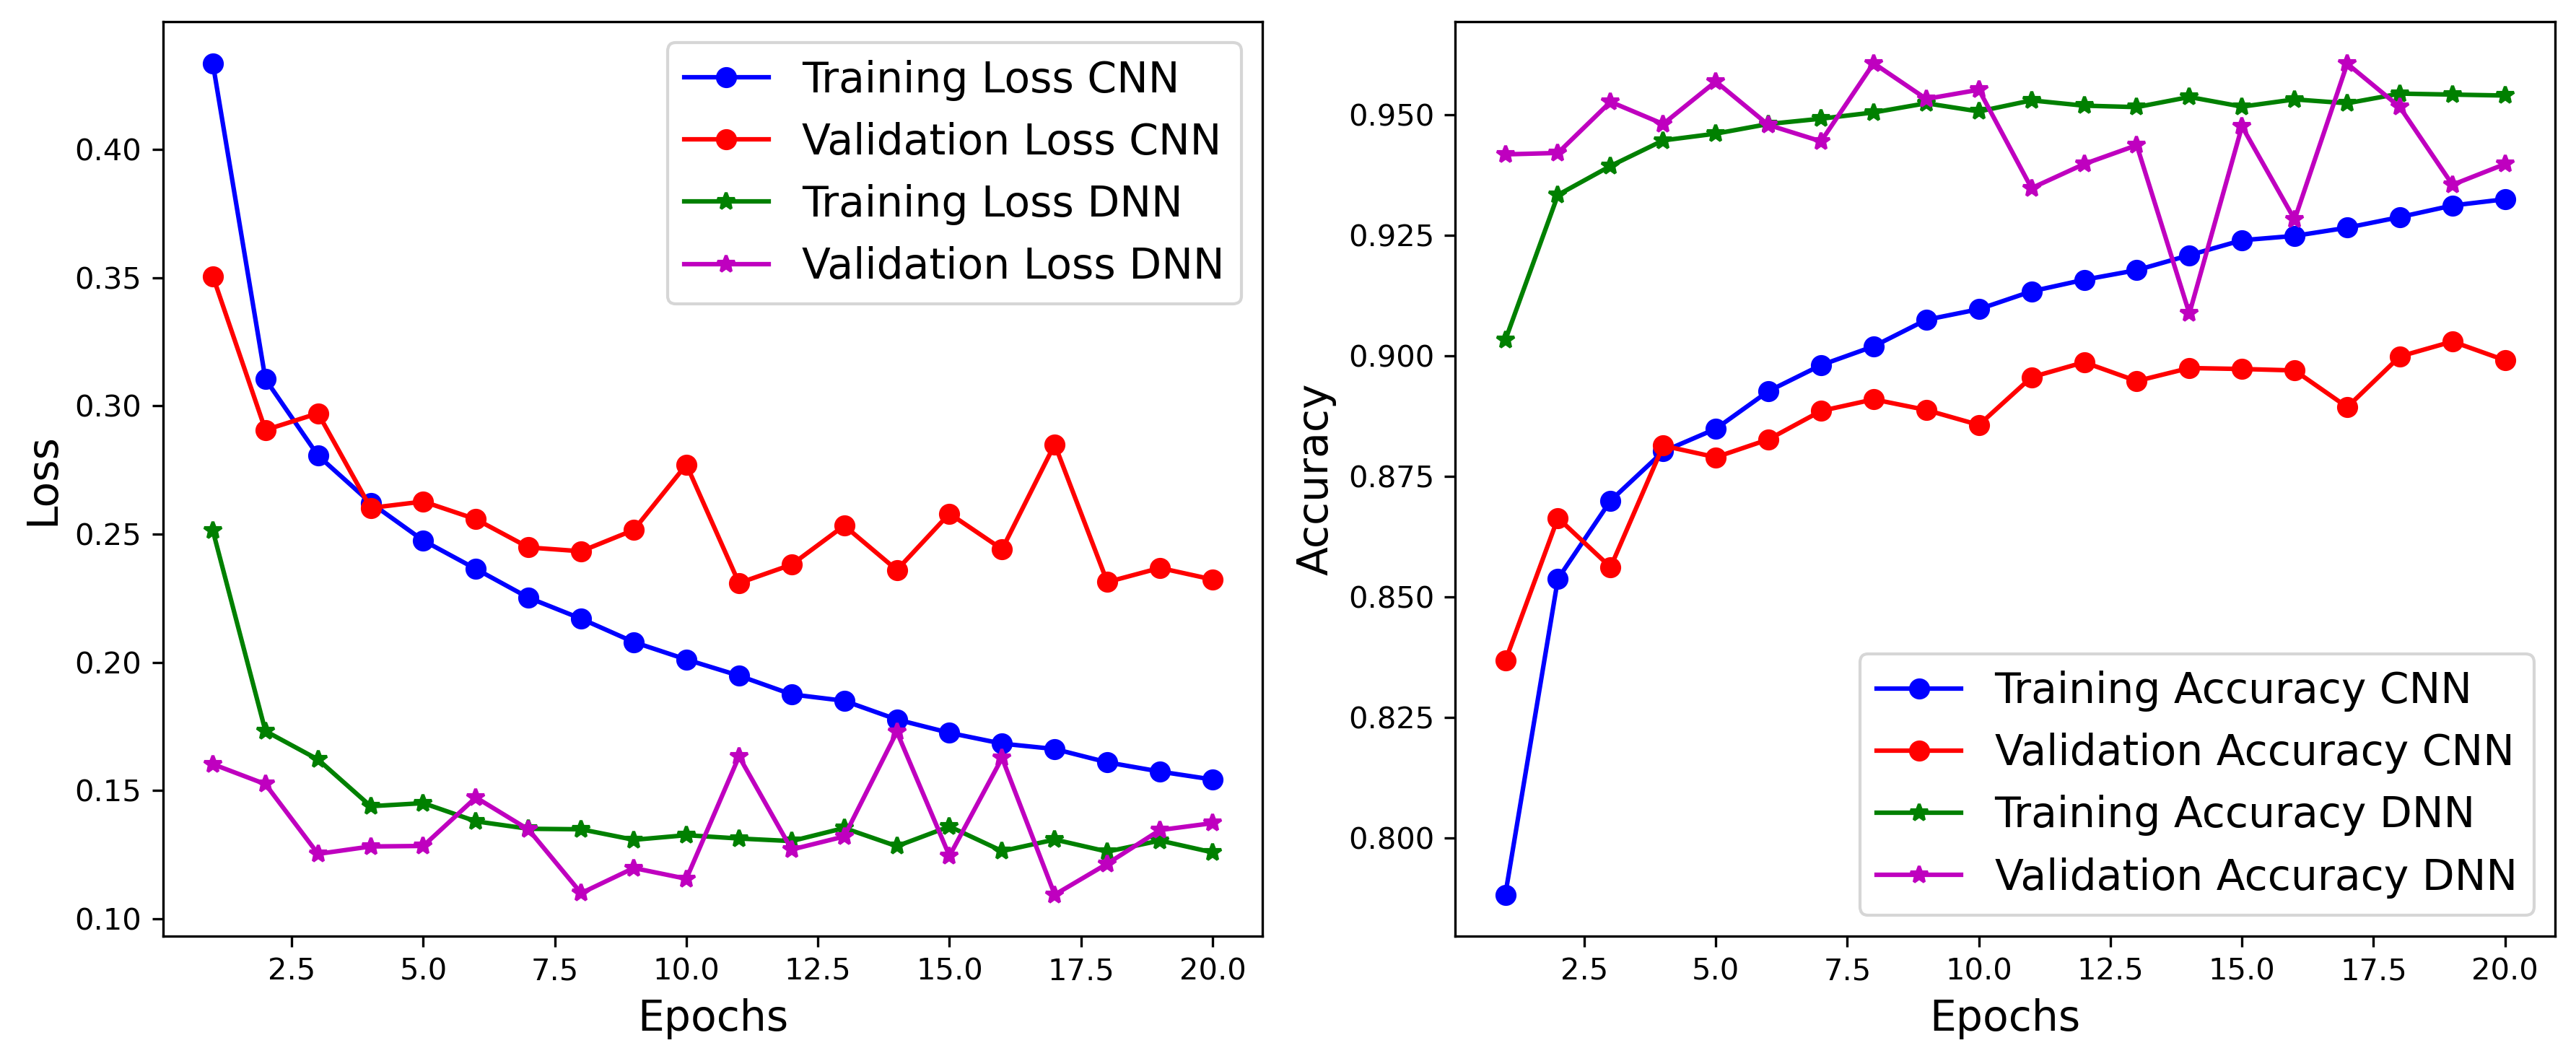

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this string with your actual data
data = '''
Epoch 1/20
1913/1913 [==============================] - 39s 20ms/step - loss: 0.4336 - accuracy: 0.7883 - val_loss: 0.3506 - val_accuracy: 0.8368
Epoch 2/20
1913/1913 [==============================] - 40s 21ms/step - loss: 0.3104 - accuracy: 0.8538 - val_loss: 0.2906 - val_accuracy: 0.8664
Epoch 3/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.2806 - accuracy: 0.8700 - val_loss: 0.2971 - val_accuracy: 0.8562
Epoch 4/20
1913/1913 [==============================] - 37s 19ms/step - loss: 0.2622 - accuracy: 0.8802 - val_loss: 0.2602 - val_accuracy: 0.8814
Epoch 5/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.2475 - accuracy: 0.8849 - val_loss: 0.2627 - val_accuracy: 0.8790
Epoch 6/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.2364 - accuracy: 0.8927 - val_loss: 0.2558 - val_accuracy: 0.8827
Epoch 7/20
1913/1913 [==============================] - 37s 19ms/step - loss: 0.2252 - accuracy: 0.8981 - val_loss: 0.2448 - val_accuracy: 0.8886
Epoch 8/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.2170 - accuracy: 0.9020 - val_loss: 0.2433 - val_accuracy: 0.8910
Epoch 9/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.2079 - accuracy: 0.9075 - val_loss: 0.2516 - val_accuracy: 0.8888
Epoch 10/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.2011 - accuracy: 0.9097 - val_loss: 0.2771 - val_accuracy: 0.8857
Epoch 11/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.1948 - accuracy: 0.9134 - val_loss: 0.2309 - val_accuracy: 0.8956
Epoch 12/20
1913/1913 [==============================] - 36s 19ms/step - loss: 0.1875 - accuracy: 0.9158 - val_loss: 0.2381 - val_accuracy: 0.8987
Epoch 13/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.1850 - accuracy: 0.9178 - val_loss: 0.2533 - val_accuracy: 0.8948
Epoch 14/20
1913/1913 [==============================] - 35s 18ms/step - loss: 0.1777 - accuracy: 0.9209 - val_loss: 0.2360 - val_accuracy: 0.8975
Epoch 15/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.1725 - accuracy: 0.9240 - val_loss: 0.2580 - val_accuracy: 0.8973
Epoch 16/20
1913/1913 [==============================] - 36s 19ms/step - loss: 0.1683 - accuracy: 0.9249 - val_loss: 0.2441 - val_accuracy: 0.8970
Epoch 17/20
1913/1913 [==============================] - 34s 18ms/step - loss: 0.1662 - accuracy: 0.9266 - val_loss: 0.2850 - val_accuracy: 0.8894
Epoch 18/20
1913/1913 [==============================] - 39s 20ms/step - loss: 0.1610 - accuracy: 0.9288 - val_loss: 0.2313 - val_accuracy: 0.8999
Epoch 19/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.1574 - accuracy: 0.9312 - val_loss: 0.2368 - val_accuracy: 0.9030
Epoch 20/20
1913/1913 [==============================] - 38s 20ms/step - loss: 0.1543 - accuracy: 0.9325 - val_loss: 0.2323 - val_accuracy: 0.8991
'''

# Initialize lists to store training and validation loss and accuracy values
train_loss_values = []
train_accuracy_values = []
val_loss_values = []
val_accuracy_values = []

# Split the data into lines
lines = data.split('\n')

# Iterate through each line and extract loss and accuracy values
for line in lines:
    if "loss:" in line and "accuracy:" in line and "val_loss:" in line and "val_accuracy:" in line:
        parts = line.split(' - ')
        train_loss = float(parts[2].split(': ')[1])
        train_accuracy = float(parts[3].split(': ')[1])
        val_loss = float(parts[4].split(': ')[1])
        val_accuracy = float(parts[5].split(': ')[1])
        train_loss_values.append(train_loss)
        train_accuracy_values.append(train_accuracy)
        val_loss_values.append(val_loss)
        val_accuracy_values.append(val_accuracy)

# Create x values (epochs)
epochs = range(1, len(train_loss_values) + 1)

# Increase font size for labels, titles, and legends
font_size = 14

# Create loss and accuracy plots
plt.figure(figsize=(12, 5),dpi=300)
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, 'bo-', label='Training Loss CNN')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss CNN')
plt.plot(epochs, train_loss_valuesD, 'g*-', label='Training Loss DNN')
plt.plot(epochs, val_loss_valuesD, 'm*-', label='Validation Loss DNN')
plt.xlabel('Epochs', fontsize=font_size)
plt.ylabel('Loss', fontsize=font_size)
plt.legend(fontsize=font_size)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_values, 'bo-', label='Training Accuracy CNN')
plt.plot(epochs, val_accuracy_values, 'ro-', label='Validation Accuracy CNN')
plt.plot(epochs, train_accuracy_valuesD, 'g*-', label='Training Accuracy DNN')
plt.plot(epochs, val_accuracy_valuesD, 'm*-', label='Validation Accuracy DNN')
plt.xlabel('Epochs', fontsize=font_size)
plt.ylabel('Accuracy', fontsize=font_size)
plt.legend(fontsize=font_size)

plt.tight_layout()


plt.savefig('BClassLossaccuracy.pdf')